
# Unveiling the Dynamics of European Train Travel
This code is a Python script that performs data manipulation and visualization on a dataset of rail passengers. It uses various libraries such as pandas, seaborn, matplotlib, pycountry, pypopulation, and CountryInfo to handle the data and create visualizations.


List of required files:
rail_passengers_total.csv
rail_passengers_kilometers_total.csv
road_eqs_carhab.csv


Thera are all in the zip folder.

The source: https://ec.europa.eu/eurostat






# Data Manipulation
The code starts by importing the necessary libraries and reading the data from a CSV file called "rail_passengers_total.csv". It then manipulates the data by transforming it into a long format using the melt() function from pandas. The passenger values are converted to numeric format and stored in the "Passengers" column. ISO codes are added to the dataset using the pycountry library based on the country names. Population values are obtained using the pypopulation library and added to the dataset. The area information is retrieved using the CountryInfo class from the CountryInfo library based on the ISO codes. The missing ISO codes for Turkey are manually added. The script also handles missing population values by setting them to None. The area values for three countries (Montenegro, Czechia, and North Macedonia) are manually added as they were missing. The script also adds the UE membership status for each country based on the accession year information provided.



In [342]:
import pandas as pd

data = pd.read_csv('rail_passengers_total.csv')

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

In [344]:
# load data
data_wide = pd.read_csv("rail_passengers_total.csv")

# trasnsform data into long format
data_long = pd.melt(data_wide, id_vars=["GEO (Labels)"], var_name="Year", value_name="Passengers")
data_long['Passengers'] = pd.to_numeric(data_long['Passengers'].str.replace(',', ''))

In [345]:
!pip install pycountry
!pip install pypopulation
!pip install CountryInfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [346]:
import pycountry

# Define a function to get ISO codes from country names
def get_iso_code(country_name):
    try:
        return pycountry.countries.search_fuzzy(country_name)[0].alpha_3
    except LookupError:
        return None

# Apply the function to create a new column 'ISO Code' based on 'GEO (Labels)'
data_long['ISO Code'] = data_long['GEO (Labels)'].apply(get_iso_code)


In [347]:
import pypopulation

# create a dictionary of country names and their corresponding population values
population_dict = {country: pypopulation.get_population(country) for country in data_long['GEO (Labels)'].unique()}

# map the dictionary onto the 'GEO (Labels)' column to add the 'Population' column
data_long['Population'] = data_long['GEO (Labels)'].map(population_dict)


In [348]:
from countryinfo import CountryInfo

def get_country_area(alpha3_code):
    try:
        country = CountryInfo(pycountry.countries.get(alpha_3=alpha3_code).name)
        return country.area()
    except (KeyError, TypeError, LookupError):
        return None

data_long['Area'] = data_long['ISO Code'].apply(get_country_area)


In [349]:
#Missing* ISO codes

In [350]:
turkey_iso = pycountry.countries.get(name='Turkey').alpha_2
data_long.loc[data_long['GEO (Labels)'] == 'Türkiye', 'ISO Code'] = turkey_iso

In [351]:
data_long.loc[data_long['ISO Code'] == 'TR', 'ISO Code'] = 'TUR'

In [352]:
import pypopulation
for i in data_long.index:
    country_code = data_long.loc[i, 'ISO Code']
    try:
        population = pypopulation.get_population(country_code)
        data_long.loc[i, 'Population'] = population
    except:
        data_long.loc[i, 'Population'] = None

In [ ]:
##no area for 3 countries

In [353]:
#searching for missing data

from countryinfo import CountryInfo

# find area by ISO code
country_iso = 'MK'
country = CountryInfo(country_iso)
area_iso = country.area()
print(area_iso)

# coding=utf-8
from countryinfo import CountryInfo

country = CountryInfo('Czech Republic')
country.area()

25713


78865

In [354]:
data_long.loc[data_long['GEO (Labels)'] == 'Montenegro', 'Area'] = 13812.0
data_long.loc[data_long['GEO (Labels)'] == 'Czechia', 'Area'] = 78865.0
data_long.loc[data_long['GEO (Labels)'] == 'North Macedonia', 'Area'] = 25713.0

# Adding the UE Membership status to data frame

In [355]:
# Define the year of accession for each country
accession_years = {
    'Belgium': 1957,
    'France': 1957,
    'Germany': 1957,
    'Italy': 1957,
    'Luxembourg': 1957,
    'Netherlands': 1957,
    'Denmark': 1973,
    'Ireland': 1973,
    'United Kingdom': 1973,
    'Greece': 1981,
    'Portugal': 1986,
    'Spain': 1986,
    'Austria': 1995,
    'Finland': 1995,
    'Sweden': 1995,
    'Cyprus': 2004,
    'Czech Republic': 2004,
    'Estonia': 2004,
    'Hungary': 2004,
    'Latvia': 2004,
    'Lithuania': 2004,
    'Malta': 2004,
    'Poland': 2004,
    'Slovakia': 2004,
    'Slovenia': 2004,
    'Czechia': 2004,
    'Bulgaria': 2007,
    'Romania': 2007,
    'Croatia': 2013
}

# Define the founding countries
founding_countries = ['Belgium', 'France', 'Germany', 'Italy', 'Luxembourg', 'Netherlands']

# Create a function to determine the group of a country
def get_group(row):
    country = row['GEO (Labels)']
    year = accession_years.get(country)
    if country in founding_countries:
        return 'Founders'
    elif year is None:
        return 'Non-members'
    else:
        return f'Accession {year}'

# Add the 'Group' column
data_long['Group'] = data_long.apply(get_group, axis=1)

In [356]:
# Create a function to determine the group of a country
def get_group(row):
    country = row['GEO (Labels)']
    year = accession_years.get(country)
    if country in founding_countries or year and year < 2004:
        return 'Old UE'
    elif year and year >= 2004:
        return 'New UE'
    else:
        return 'Non Members'

# Add the 'UE Membership' column
data_long['UE Membership'] = data_long.apply(get_group, axis=1)

In [357]:
display(data_long)

,GEO (Labels),Year,Passengers,ISO Code,Population,Area,Group,UE Membership
0,Belgium,2004,184033.0,BEL,11484055,30528.0,Founders,Old UE
1,Bulgaria,2004,NaN,BGR,6975761,110879.0,Accession 2007,New UE
2,Czechia,2004,180282.0,CZE,10669709,78865.0,Accession 2004,New UE
3,Denmark,2004,168552.0,DNK,5818553,43094.0,Accession 1973,Old UE
4,Germany,2004,2091268.0,DEU,83132799,357114.0,Founders,Old UE
...,...,...,...,...,...,...,...,...
589,United Kingdom,2021,NaN,GBR,66834405,242900.0,Accession 1973,Old UE
590,Montenegro,2021,NaN,MNE,622137,13812.0,Non-members,Non Members
591,North Macedonia,2021,252.0,MKD,2083459,25713.0,Non-members,Non Members
592,Türkiye,2021,136103.0,TUR,83429615,NaN,Non-members,Non Members


In [358]:
df=data_long

In [359]:
# Convert the "Year" column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Joining new data
The script reads another CSV file called "road_eqs_carhab.csv" and performs data manipulation to convert it into long format. It then merges this data with the existing dataset based on the country names and years.



In [360]:
car_data = pd.read_csv("road_eqs_carhab.csv", index_col=0)

In [361]:
# Reset index to convert "GEO (Labels)" into a column
car_data_reset = car_data.reset_index()

# Use melt to transform the DataFrame into long format
long_data = pd.melt(car_data_reset, id_vars=['GEO (Labels)'], var_name='Year', value_name='Cars per 1000 citizens')

# Sort the data by "GEO (Labels)" and "Year"
long_data_sorted = long_data.sort_values(['GEO (Labels)', 'Year'])

# Print the long data
print(long_data_sorted)

       GEO (Labels)  Year  Cars per 1000 citizens
35          Albania  2004                     NaN
73          Albania  2005                     NaN
111         Albania  2006                     NaN
149         Albania  2007                     NaN
187         Albania  2008                     NaN
..              ...   ...                     ...
525  United Kingdom  2017                   471.0
563  United Kingdom  2018                   473.0
601  United Kingdom  2019                     NaN
639  United Kingdom  2020                     NaN
677  United Kingdom  2021                   476.0

[684 rows x 3 columns]


In [362]:
# Convert "Year" column in long_data to datetime format
long_data['Year'] = pd.to_datetime(long_data['Year'])

# Merge the two DataFrames based on "GEO (Labels)" and "Year"
df = pd.merge(df, long_data[['GEO (Labels)', 'Year', 'Cars per 1000 citizens']], how='left', on=['GEO (Labels)', 'Year'])

# Print the updated df
print(df)

               GEO (Labels)       Year  Passengers ISO Code Population  \
0                   Belgium 2004-01-01    184033.0      BEL   11484055   
1                  Bulgaria 2004-01-01         NaN      BGR    6975761   
2                   Czechia 2004-01-01    180282.0      CZE   10669709   
3                   Denmark 2004-01-01    168552.0      DNK    5818553   
4                   Germany 2004-01-01   2091268.0      DEU   83132799   
..                      ...        ...         ...      ...        ...   
589          United Kingdom 2021-01-01         NaN      GBR   66834405   
590              Montenegro 2021-01-01         NaN      MNE     622137   
591         North Macedonia 2021-01-01       252.0      MKD    2083459   
592                 Türkiye 2021-01-01    136103.0      TUR   83429615   
593  Bosnia and Herzegovina 2021-01-01       250.0      BIH    3301000   

         Area           Group UE Membership  Cars per 1000 citizens  
0     30528.0        Founders        Old 

In [363]:
pd.read_csv("rail_passengers_kilometers_total.csv")

,GEO (Labels),2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Belgium,"9,225","8,510","8,964","9,403","10,139","10,237","10,498","10,669",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bulgaria,NaN,NaN,"2,411","2,404","2,317","2,138","2,090","2,059","1,870","1,821","1,698","1,549","1,455","1,434","1,476","1,520","1,118","1,203"
2,Czechia,"6,580","6,667","6,922","6,898","6,773","6,472","6,559","6,669","7,196","7,512","7,644","8,125","8,738","9,403","10,220","10,856","6,623","6,752"
3,Denmark,"5,921","5,961","6,097","6,163","6,267","6,161","6,341","6,605","6,744","6,785","6,513","6,507","6,332","6,280","6,182","6,174","3,940","4,181"
4,Germany,"75,903","74,944","78,735","79,098","82,428","81,206","82,837","89,316","93,918","89,450","90,978","91,050","95,465","95,529","98,161","100,252","57,787","57,518"
5,Estonia,193,248,257,274,274,249,247,243,235,223,280,286,316,366,417,392,263,290
6,Ireland,"1,582","1,781","1,872","2,007","1,976","1,683","1,678","1,638","1,578","1,569","1,728","1,918","1,991","2,122","2,281","2,399",834,870
7,Greece,"1,668","1,854","1,811","1,930","1,657","1,467","1,383",958,832,"1,056","1,072","1,263","1,192","1,112","1,104","1,252",640,653
8,Spain,"20,328","21,151","21,620","21,362","23,453","23,055","22,343","22,931","22,446","23,755","25,034","26,108","26,646","27,490","28,420","28,847","12,060","17,002"
9,France,"74,359","76,884","79,809","81,961","86,516","88,610",NaN,NaN,"91,205","90,485","89,499","91,377","91,832","95,024","91,818","96,540","56,606","75,854"


#Joing the passengers kilometers data

Another CSV file called "rail_passengers_kilometers_total.csv" is read, and the data is converted to long format. This data is then joined with the existing dataset based on country names and years.



In [364]:
# Read the rail_passengers_kilometers_total.csv file
rail_data = pd.read_csv('rail_passengers_kilometers_total.csv')

# Convert the data to long format
rail_long_data = rail_data.melt(id_vars='GEO (Labels)', var_name='Year', value_name='Passenger Kilometers')


In [365]:
# Convert the "Year" column to datetime64 data type in both DataFrames
df['Year'] = pd.to_datetime(df['Year'])
rail_long_data['Year'] = pd.to_datetime(rail_long_data['Year'])

# Join the "Passenger Kilometers" column to df
df = pd.merge(df, rail_long_data, on=['GEO (Labels)', 'Year'], how='left')

# Convert columns to the desired data formats
The script performs data type conversions for various columns in the dataset to the desired formats. The "Year" column is converted to a datetime format, and other columns are converted to appropriate numeric or string formats.



In [366]:
# Calculate the total number of passengers
total_passengers = df['Passengers'].sum()

In [367]:
df['Passengers per Capita'] = df['Passengers'] *1000 / df['Population']

In [368]:
# Convert columns to the desired data formats
df['Passengers'] = df['Passengers'].astype(float)
df['Population'] = df['Population'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Group'] = df['Group'].astype(str)
df['UE Membership'] = df['UE Membership'].astype(str)
df['Passengers per Capita'] = df['Passengers per Capita'].astype(float)
df['Passenger Kilometers'] = df['Passenger Kilometers'].str.replace(',', '').astype(float)
df['Cars per 1000 citizens'] = df['Cars per 1000 citizens'].astype(float)

# Convert "Year" column to YYYY format
df['Year'] = df['Year'].dt.strftime('%Y')


In [369]:
df = df.rename(columns={'Passenger Kilometers': 'Passenger Kilometers (M)', 'Passengers': 'Passengers (K)'})

In [370]:
# Assuming your data is stored in a DataFrame called 'df'
df['Pct Change per Year'] = (df['Passengers (K)'] - df['Passengers (K)'].shift(1)) / df['Passengers (K)'].shift(1) * 100


In [371]:
display(df)

,GEO (Labels),Year,Passengers (K),ISO Code,Population,Area,Group,UE Membership,Cars per 1000 citizens,Passenger Kilometers (M),Passengers per Capita,Pct Change per Year
0,Belgium,2004,184033.0,BEL,11484055,30528.0,Founders,Old UE,467.0,9225.0,16.025089,NaN
1,Bulgaria,2004,NaN,BGR,6975761,110879.0,Accession 2007,New UE,317.0,NaN,NaN,NaN
2,Czechia,2004,180282.0,CZE,10669709,78865.0,Accession 2004,New UE,374.0,6580.0,16.896618,NaN
3,Denmark,2004,168552.0,DNK,5818553,43094.0,Accession 1973,Old UE,350.0,5921.0,28.968027,-6.506473
4,Germany,2004,2091268.0,DEU,83132799,357114.0,Founders,Old UE,550.0,75903.0,25.155751,1140.725711
...,...,...,...,...,...,...,...,...,...,...,...,...
589,United Kingdom,2021,NaN,GBR,66834405,242900.0,Accession 1973,Old UE,476.0,NaN,NaN,NaN
590,Montenegro,2021,NaN,MNE,622137,13812.0,Non-members,Non Members,358.0,NaN,NaN,NaN
591,North Macedonia,2021,252.0,MKD,2083459,25713.0,Non-members,Non Members,260.0,25.0,0.120953,NaN
592,Türkiye,2021,136103.0,TUR,83429615,NaN,Non-members,Non Members,NaN,8544.0,1.631351,53909.126984


# **Set the Style**
The script sets the style for visualizations using the seaborn library. It defines a custom color palette, sets the theme, and adjusts the font sizes.



In [372]:
# Define the custom color palette
palette = ["#000000", "#1098f7", "#b89e97", "#decccc", "#ffffff"]

# Define the color mapping for UE Membership categories
hue_colors = {"New UE": palette[0], "Non Members": palette[1], "Old UE": palette[2]}

# Set the Seaborn theme and palette
sns.set_theme(style="whitegrid", palette=hue_colors.values())

# Set the Seaborn palette to the custom palette
sns.set_palette(palette)

# Set the font sizes
sns.set_context("paper", font_scale=1.2)


# **Overview**
The script creates an overview visualization of the sum of passengers over the years. It groups the data by year and calculates the sum of passengers for each year. It then creates a line chart using seaborn and matplotlib libraries, with a specific color palette and customizations for the plot title, axis labels, and data markers. The y-axis limits are set based on the data scale, and y-axis tick labels and tick marks are removed. The plot also includes annotations for specific years.

The script also creates another overview visualization with additional dashed lines and labels to mark specific years.

Overall, this code provides a comprehensive analysis of rail passenger data, including data manipulation, joining with additional data sources, and visualization of key insights.

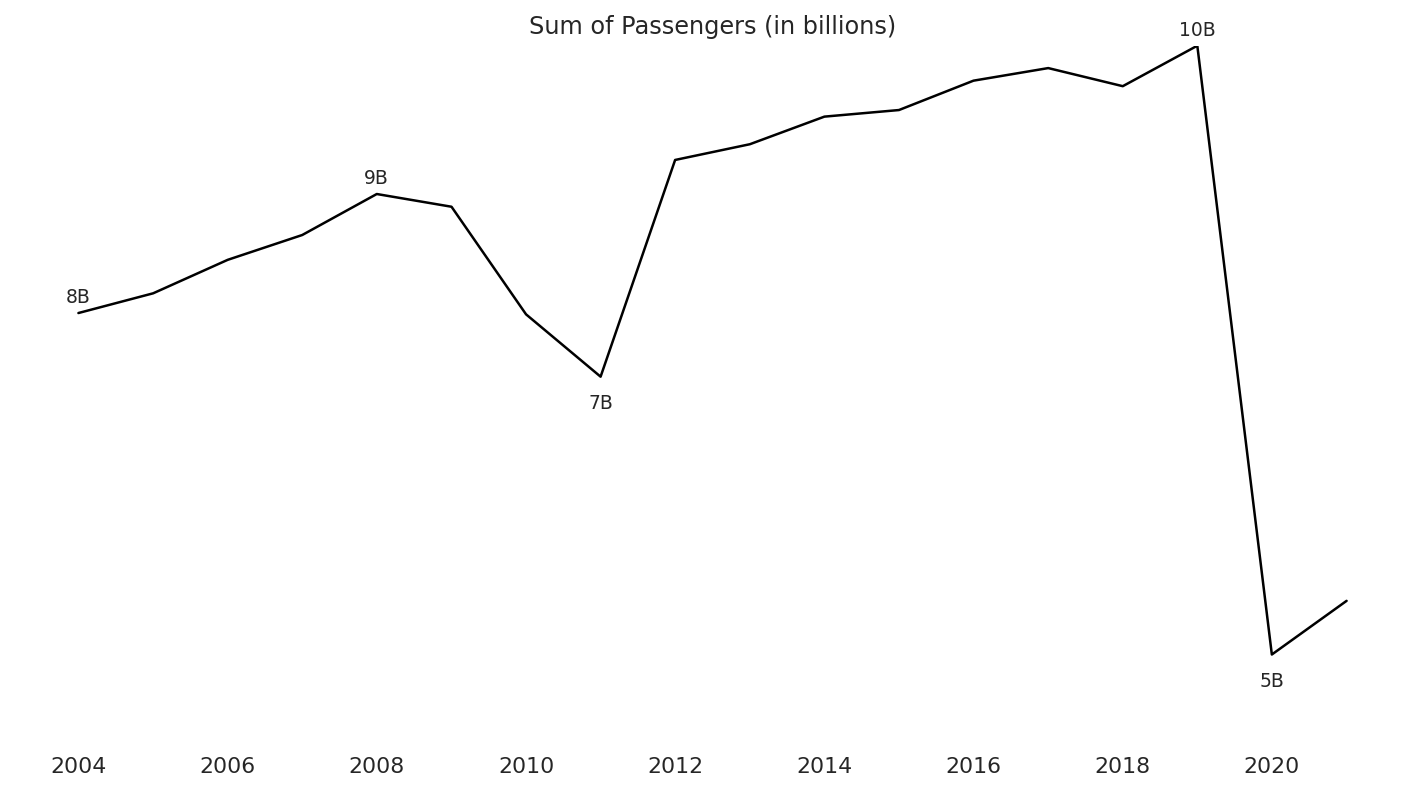

In [373]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Convert the "Year" column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group the data by year and calculate the sum of passengers
grouped_data = df.groupby('Year')['Passengers (K)'].sum().reset_index()

# Set the plot style to white
sns.set_style('white')

# Create the line chart with higher DPI
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)  # Set the figure size and DPI

# Set a specific color from the default palette
custom_color = sns.color_palette()[0]

sns.lineplot(x='Year', y='Passengers (K)', data=grouped_data, ax=ax)

# Set the plot title and axis labels
plt.title("Sum of Passengers (in billions)")
plt.xlabel('')  # Remove x-axis title
plt.ylabel('')  # Remove y-axis title

# Set the y-axis limits based on the data scale
y_lower = 0.4 * 1e7  # Adjust the multiplier as per your data scale
y_upper = grouped_data['Passengers (K)'].max()  # Set the upper limit based on the maximum value in the data
plt.ylim(y_lower, y_upper)

# Remove y-axis tick labels and tick marks
ax.yaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())

# Remove black frames
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)

# Label the data points for specific years
for _, row in grouped_data.iterrows():
    year = row['Year'].year
    value = row['Passengers (K)']
    if year in [2004, 2008, 2019]:
        ax.annotate('{:.0f}B'.format(value * 1e-6), xy=(pd.to_datetime(str(year)), value),
                    xytext=(0, 5), textcoords='offset points', ha='center', fontsize=9)
    elif year in [2011, 2020]:
        ax.annotate('{:.0f}B'.format(value * 1e-6), xy=(pd.to_datetime(str(year)), value),
                    xytext=(0, -15), textcoords='offset points', ha='center', fontsize=9)

# Display the plot
plt.show()

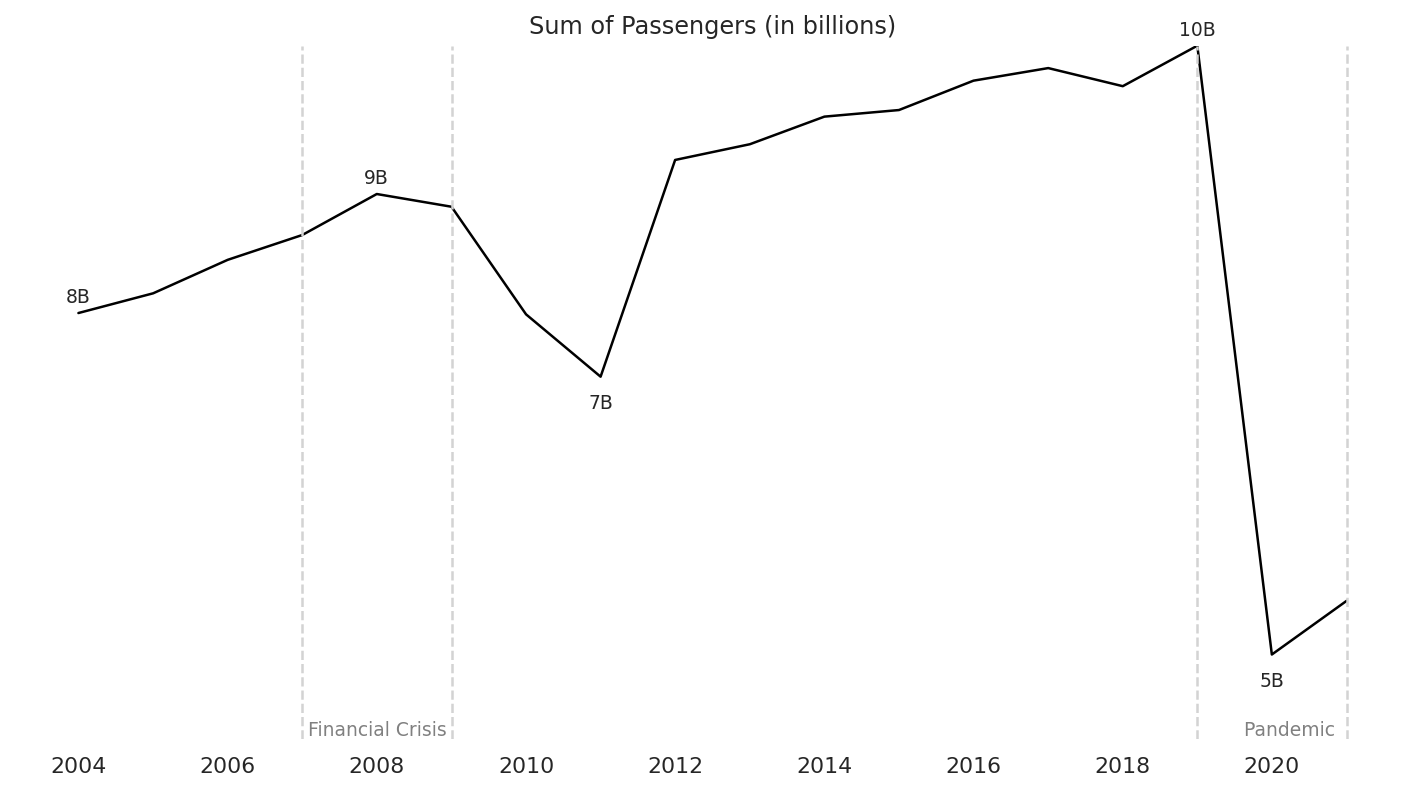

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Convert the "Year" column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group the data by year and calculate the sum of passengers
grouped_data = df.groupby('Year')['Passengers (K)'].sum().reset_index()

# Set the plot style to white
sns.set_style('white')

# Create the line chart with higher DPI
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)  # Set the figure size and DPI

# Set a specific color from the default palette
custom_color = sns.color_palette()[0]

sns.lineplot(x='Year', y='Passengers (K)', data=grouped_data, ax=ax)

# Set the plot title and axis labels
plt.title("Sum of Passengers (in billions)")
plt.xlabel('')  # Remove x-axis title
plt.ylabel('')  # Remove y-axis title

# Mark the years 2019-2020 and 2007-2008 with dashed lines and label
start_date_1 = pd.to_datetime('2019-01-01')
end_date_1 = pd.to_datetime('2021-01-01')
start_date_2 = pd.to_datetime('2007-01-01')
end_date_2 = pd.to_datetime('2009-01-01')
ax.axvline(start_date_1, color='lightgray', linestyle='--')
ax.axvline(end_date_1, color='lightgray', linestyle='--')
ax.axvline(start_date_2, color='lightgray', linestyle='--')
ax.axvline(end_date_2, color='lightgray', linestyle='--')

# Set the y-axis limits based on the data scale
y_lower = 0.4 * 1e7  # Adjust the multiplier as per your data scale
y_upper = grouped_data['Passengers (K)'].max()  # Set the upper limit based on the maximum value in the data
plt.ylim(y_lower, y_upper)

# Remove y-axis tick labels and tick marks
ax.yaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())

# Remove black frames
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)

# Add legend labels for Covid Pandemic and Financial Crisis
legend = plt.legend(handles=[], frameon=False)  # Remove existing legend

# Create separate legend labels
legend_text_1 = 'Pandemic  '
legend_text_2 = ' Financial Crisis  '

# Add separate legend labels to the plot
ax.text(end_date_1, y_lower, legend_text_1, color='gray', ha='right', va='bottom', fontsize=9)
ax.text(start_date_2, y_lower, legend_text_2, color='gray', ha='left', va='bottom', fontsize=9)

# Label the data points for specific years
for _, row in grouped_data.iterrows():
    year = row['Year'].year
    value = row['Passengers (K)']
    if year in [2004, 2008, 2019]:
        ax.annotate('{:.0f}B'.format(value * 1e-6), xy=(pd.to_datetime(str(year)), value),
                    xytext=(0, 5), textcoords='offset points', ha='center', fontsize=9)
    elif year in [2011, 2020]:
        ax.annotate('{:.0f}B'.format(value * 1e-6), xy=(pd.to_datetime(str(year)), value),
                    xytext=(0, -15), textcoords='offset points', ha='center', fontsize=9)

# Display the plot
plt.show()

# United in Diversity
The given code appears to be a set of instructions for creating visualizations using the seaborn and matplotlib libraries in Python. It seems to be related to analyzing and visualizing data on passengers per capita and UE (European Union) membership.

The code is divided into multiple sections, each responsible for creating a different type of plot. Here's a breakdown of the code:

1. Section 1:
   - Filters the DataFrame for data from the year 2021.
   - Sorts the DataFrame based on the "Passengers per Capita" column in descending order.
   - Selects the top 10 rows with the highest passengers per capita.
   - Prints the top 10 countries and their corresponding passengers per capita.

2. Section 2:
   - Defines hue colors for different UE membership categories.
   - Creates a bar plot using seaborn's barplot function, representing the passengers per capita per country.
   - Sets labels, title, legend position, and grid lines for the plot.
   - Adjusts layout spacing.
   - Displays the plot using matplotlib's show() function.

3. Section 3:
   - Creates a strip plot using seaborn's stripplot function, representing the passengers per capita per country based on UE membership.
   - Sets labels, title, legend position, spines, grid lines, and y-axis tick values for the plot.
   - Adjusts layout spacing.
   - Displays the plot using matplotlib's show() function.

4. Section 4:
   - Defines hue colors for different UE membership categories.
   - Sets the background color to white using seaborn's set_style function.
   - Calculates the mean passengers per capita for each UE membership category and sorts them.
   - Creates a bar plot using seaborn's barplot function, representing the average passengers per capita by UE membership.
   - Annotates each bar with its value.
   - Removes y-axis ticks and labels, as well as x-axis ticks.
   - Sets the x-axis label and title.
   - Removes the frame around the plot.
   - Creates a custom legend.
   - Displays the plot using matplotlib's show() function.

5. Section 5:
   - Defines hue colors for different UE membership categories.
   - Plots a scatter plot using seaborn's relplot function, representing the relationship between area, population, UE membership, and cars per 1000 citizens.
   - Uses different sizes and colors to represent different variables.
   - Sets the height of the plot and provides the DataFrame with the required data.
   
Overall, the code demonstrates different visualization techniques to analyze and present data related to passengers per capita and UE membership.

In [375]:
# Filter the DataFrame for 2021 data
df_2021 = df[df['Year'] == '2021']

# Sort the DataFrame by Passengers Per Capita
df_sorted = df_2021.sort_values('Passengers per Capita', ascending=False)

# Select the top 10 rows
top10 = df_sorted.head(10)

# Print the top 10 countries with the best Passengers Per Capita
print(top10[['GEO (Labels)', 'Passengers per Capita']])


      GEO (Labels)  Passengers per Capita
588    Switzerland              49.086909
575     Luxembourg              26.770620
578        Austria              24.501449
564        Denmark              23.042842
565        Germany              21.187642
586  Liechtenstein              18.674873
585         Sweden              15.992490
570         France              13.337288
563        Czechia              12.660420
580       Portugal              11.753540


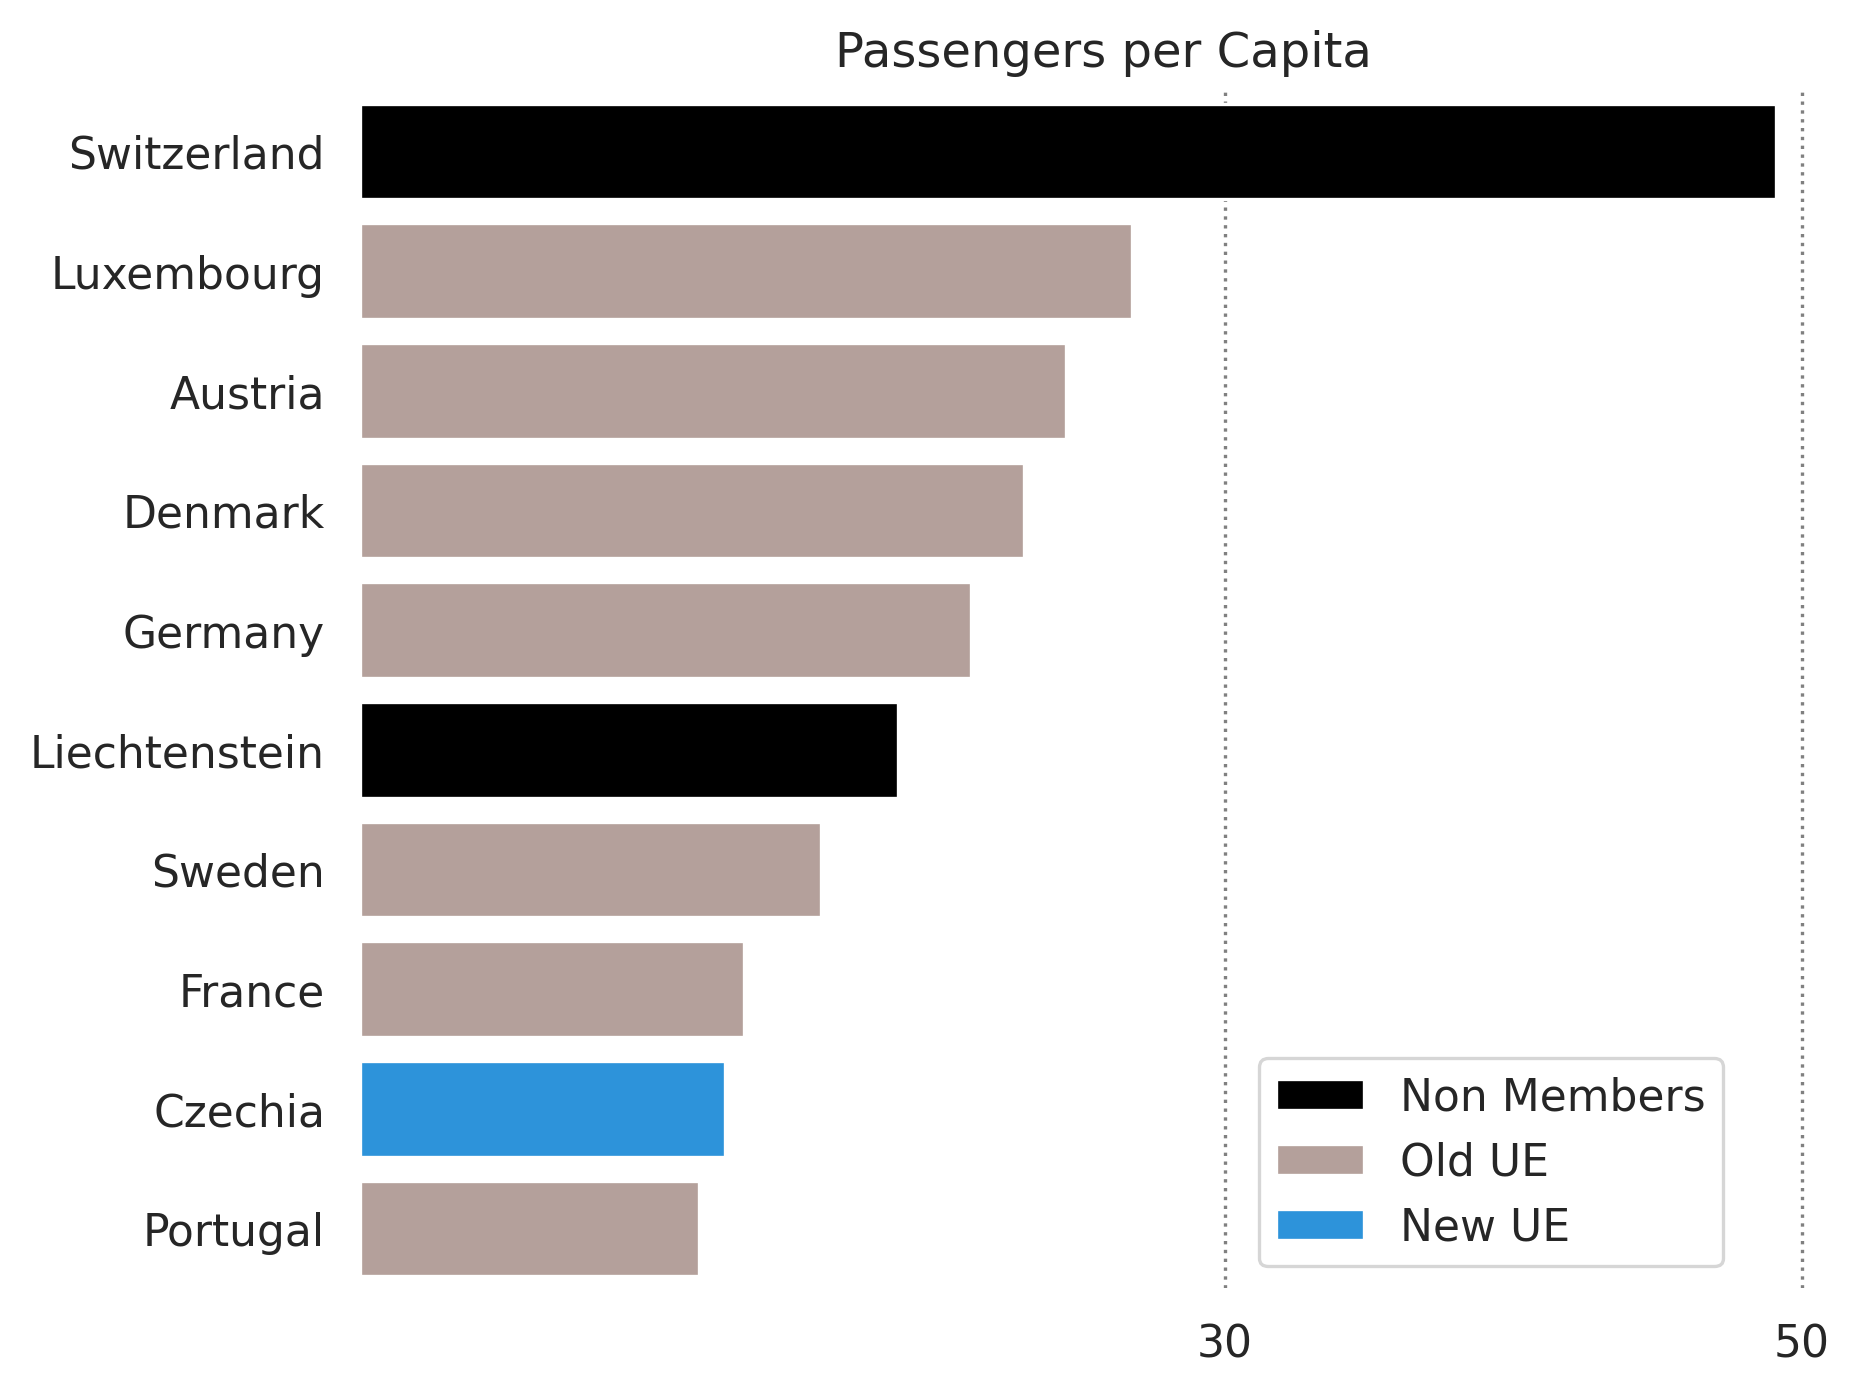

In [376]:
# Define the hue colors
hue_colors = {"New UE": palette[1], "Non Members": palette[0], "Old UE": palette[2]}

# Create a figure with higher DPI
plt.figure(dpi=300)

# Plot the Passengers per Capita per Country
ax = sns.barplot(x="Passengers per Capita", y="GEO (Labels)", hue="UE Membership", palette=hue_colors, data=top10,
                 dodge=False)

# Add labels and title
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Passengers per Capita")

# Create a custom legend
handles, labels = ax.get_legend_handles_labels()

# Specify the legend position using bbox_to_anchor
plt.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.59, 0))

# Remove spines
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set grid lines to dotted gray
ax.xaxis.grid(True, linestyle='dotted', color='gray')
ax.set_xticks([30, 50])

# Adjust layout spacing
plt.tight_layout()

# Display the plot
plt.show()


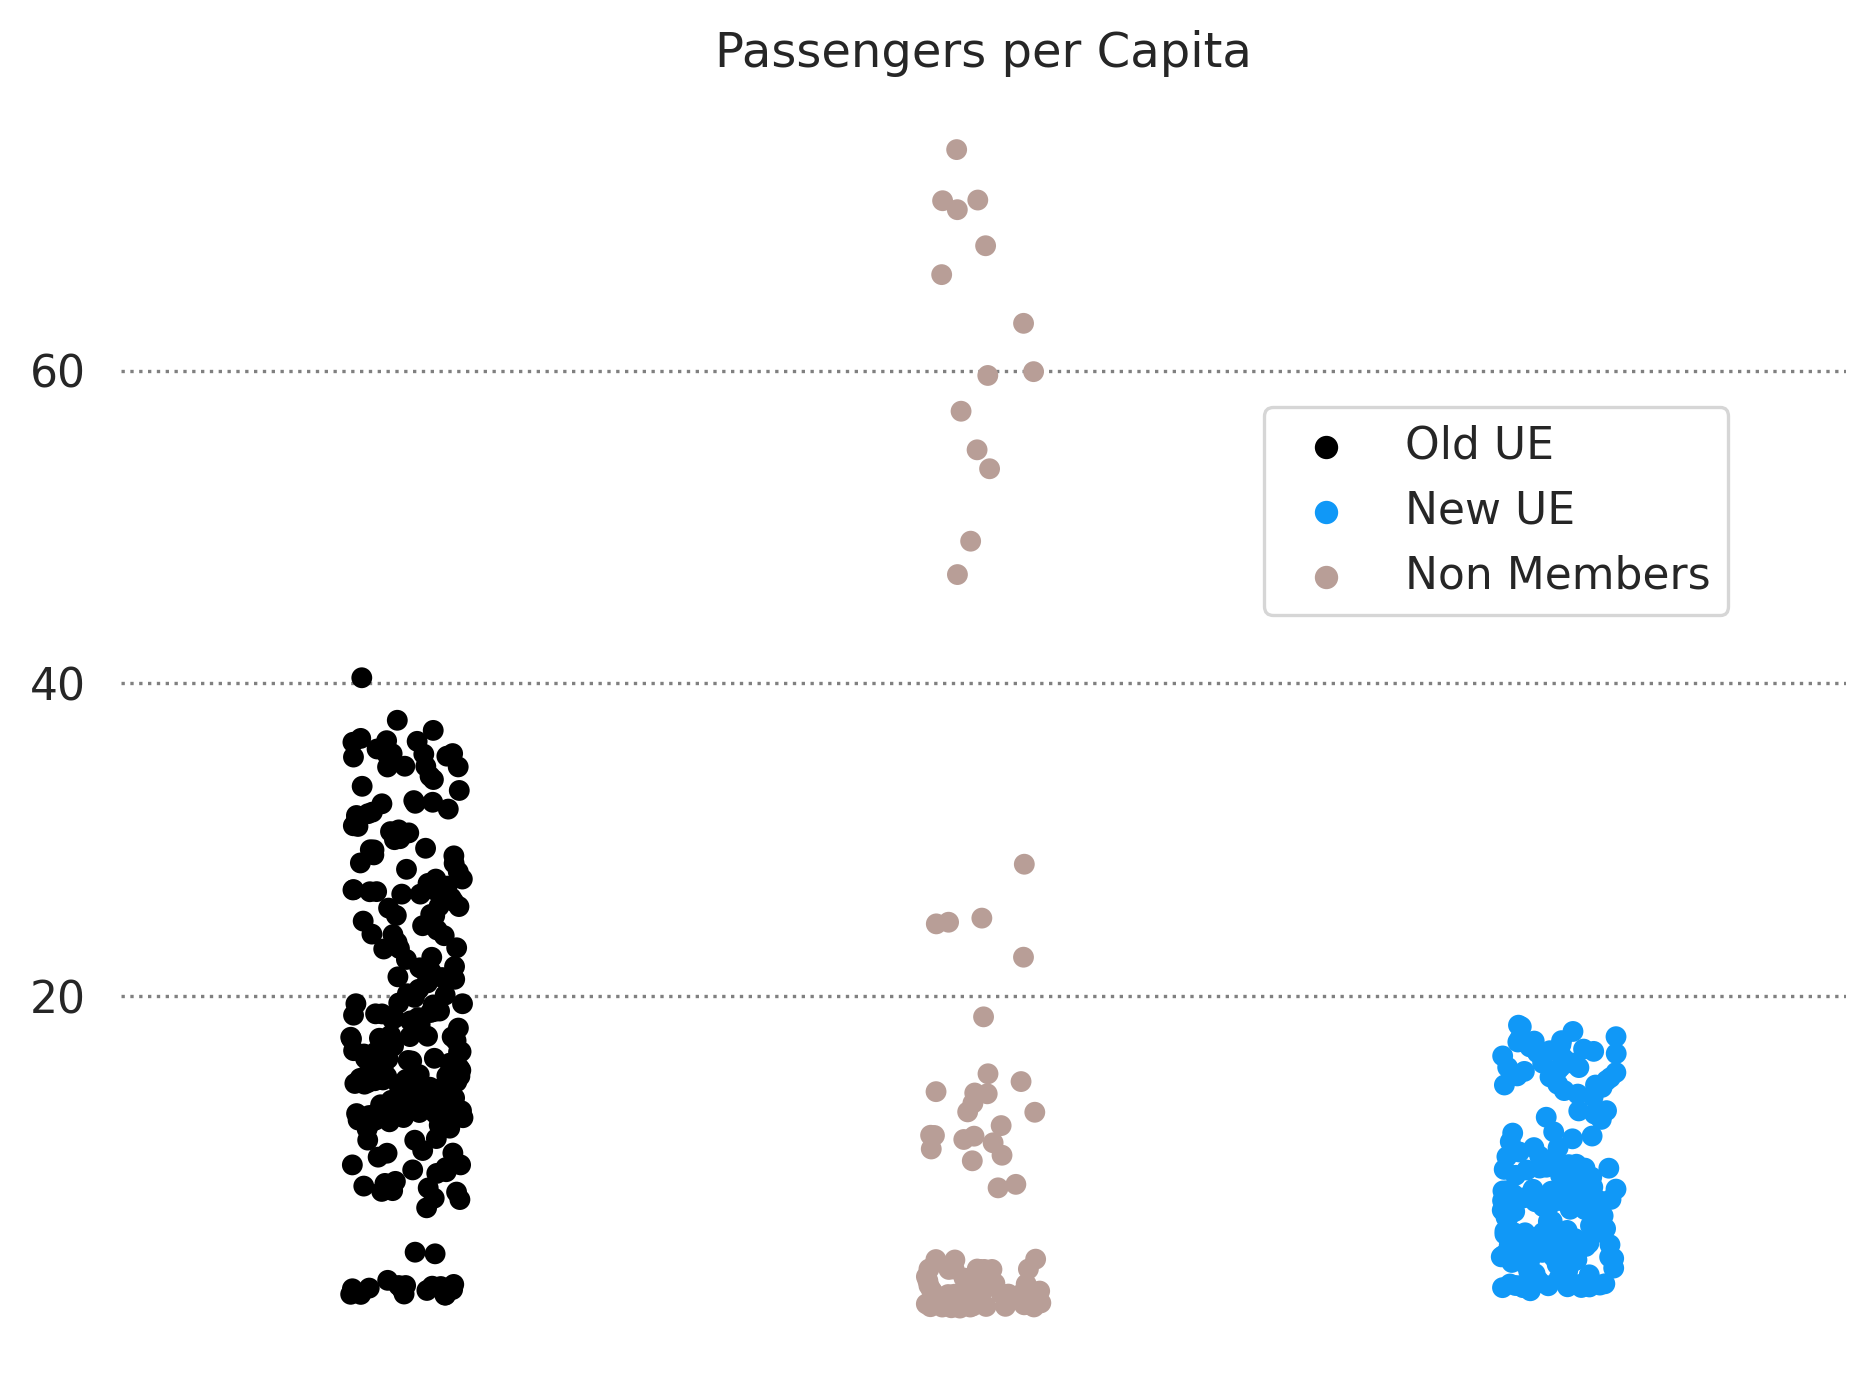

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with higher DPI
plt.figure(dpi=300)

# Define the desired order of categories
category_order = ["Old UE", "Non Members", "New UE"]

# Plot the Passengers per Capita per Country
ax = sns.stripplot(x="UE Membership", y="Passengers per Capita", data=df,
                   hue="UE Membership", jitter=0.1, linewidth=0,
                   edgecolor="black", facecolor="lightgray", order=category_order)



# Add labels and title
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Passengers per Capita")

# Remove x-axis labels and ticks
ax.set_xticklabels([])
ax.set_xticks([])

# Create a custom legend
handles, labels = ax.get_legend_handles_labels()

# Specify the legend position using bbox_to_anchor
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.65, 0.77))

# Remove spines
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set grid lines to dotted gray on the y-axis
ax.yaxis.grid(True, linestyle='dotted', color='gray')

# Set y-axis tick values
plt.yticks([20, 40, 60])

# Adjust layout spacing
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-378-cef3450a426f>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="UE Membership", y="Passengers per Capita", data=df, order=sorted_groups, palette=hue_colors, ci=None)


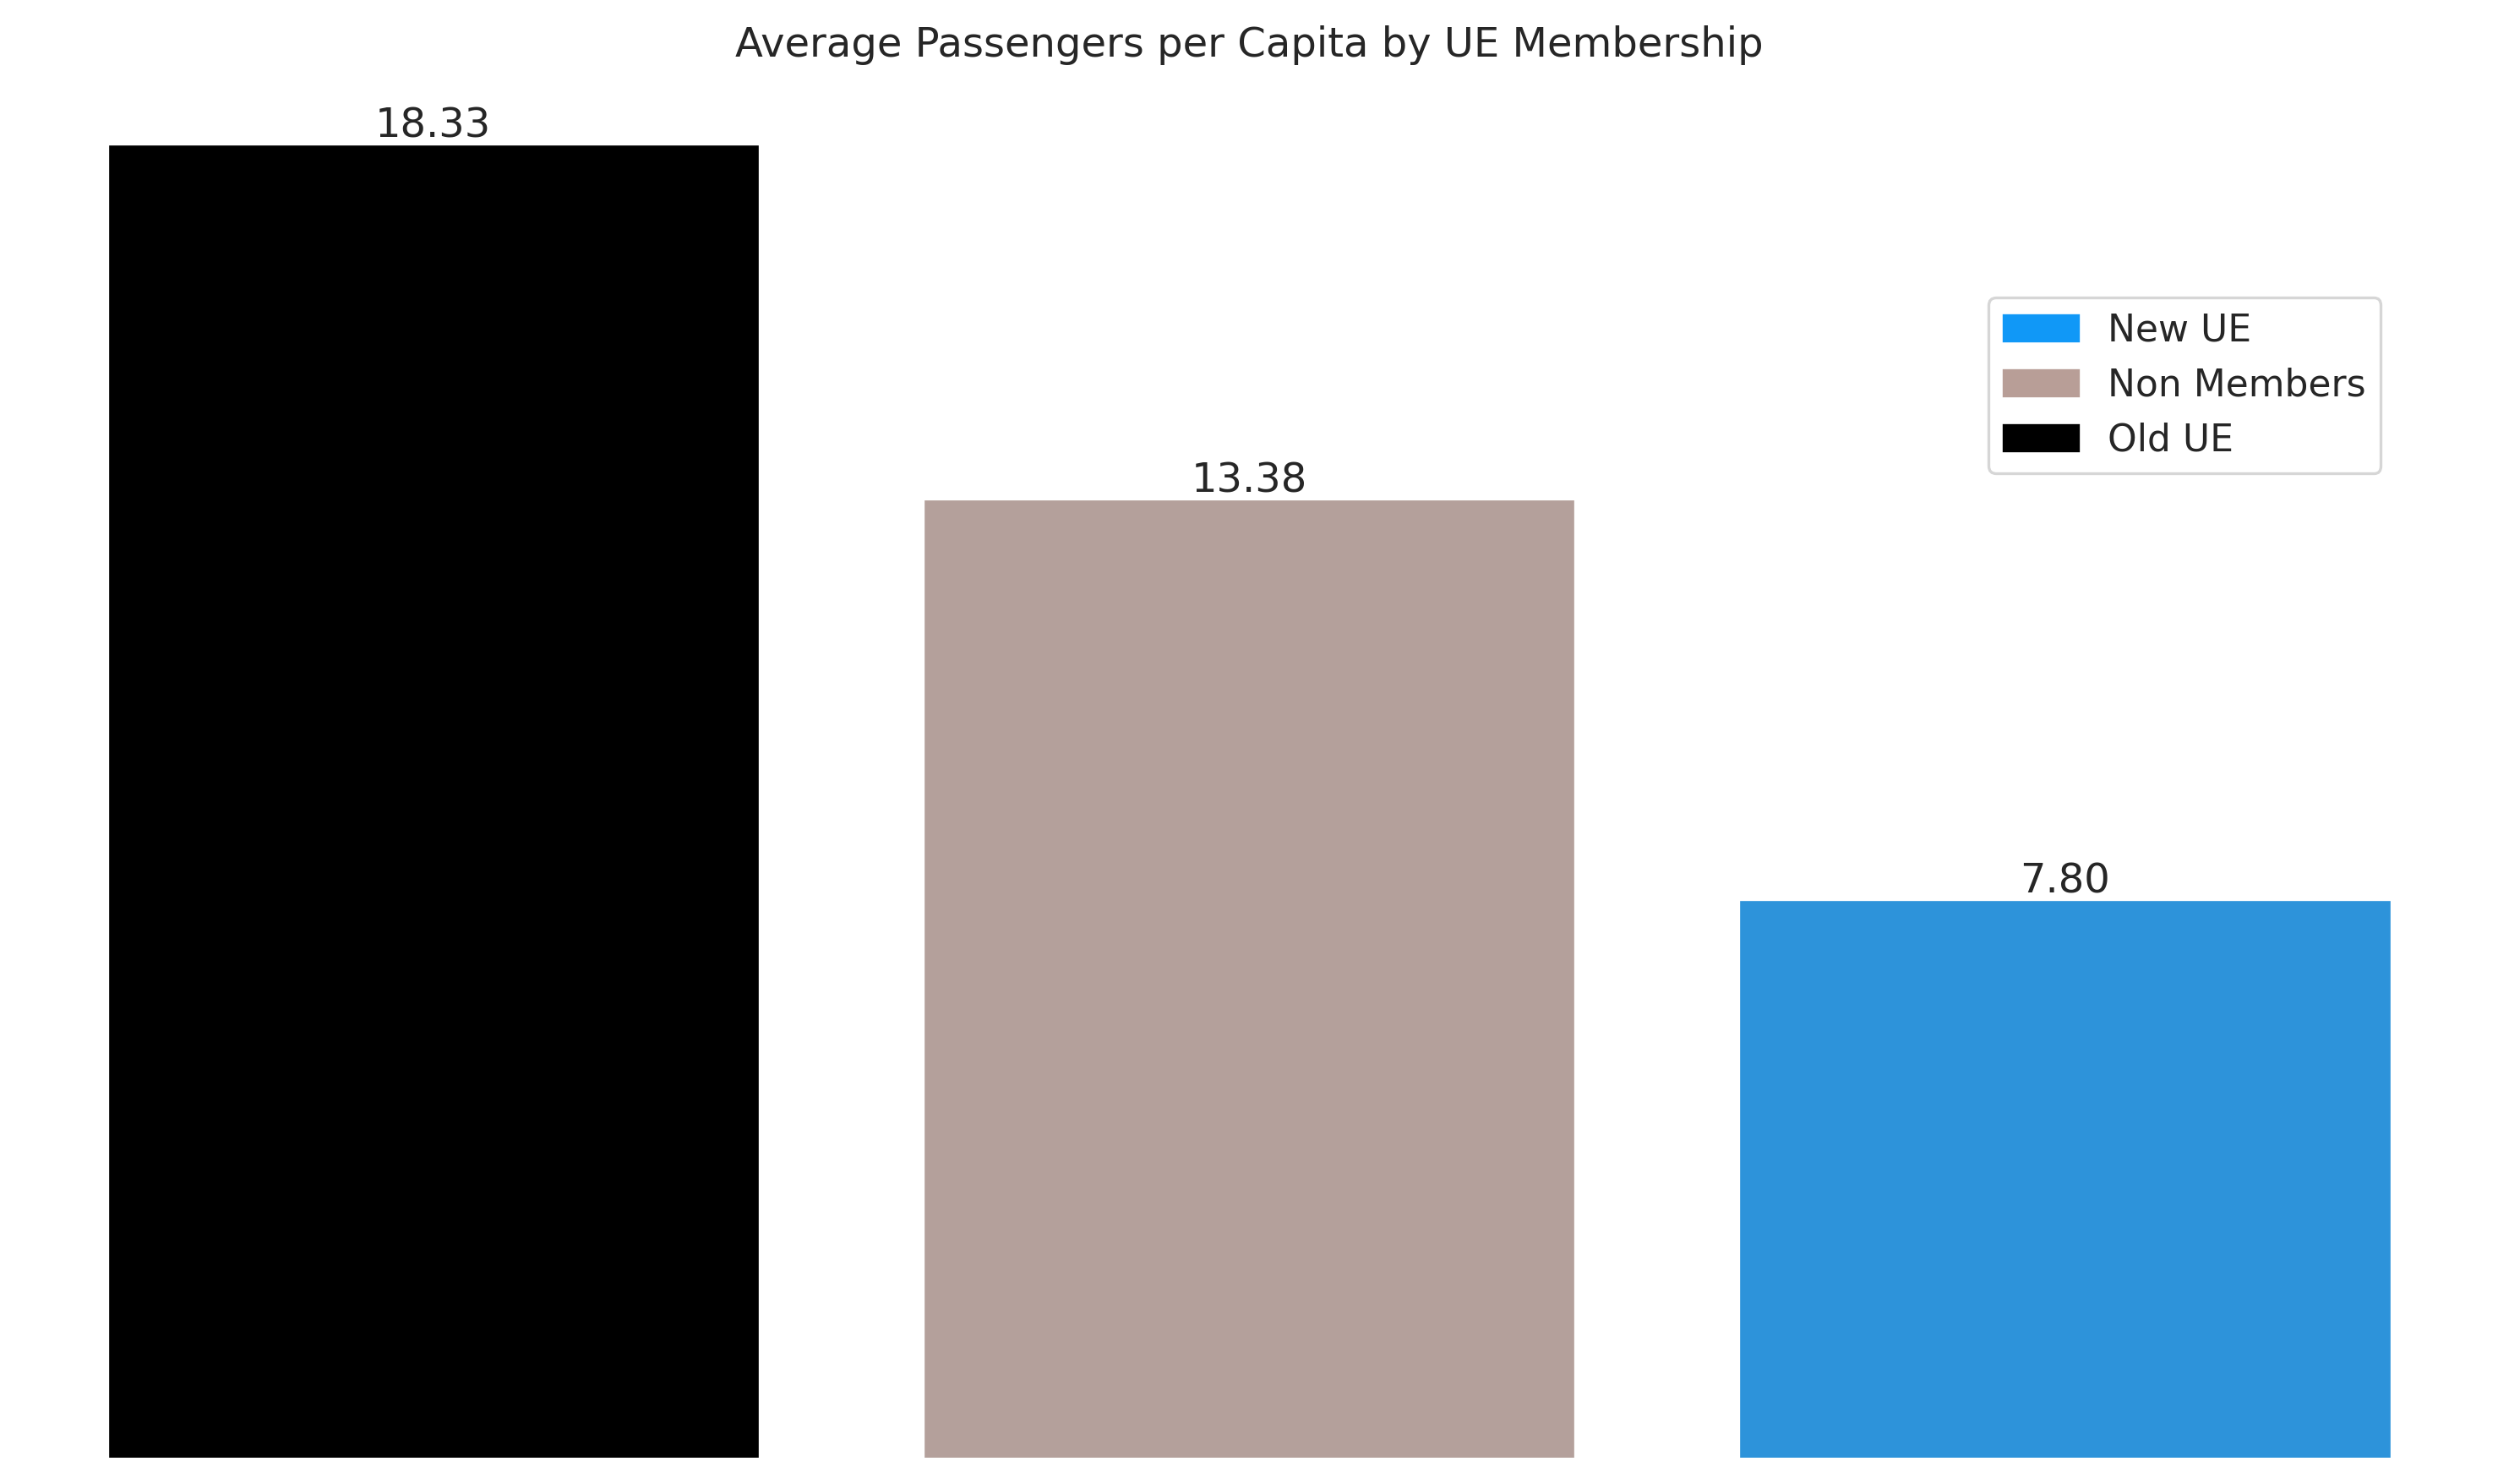

In [378]:
# Define the hue colors
hue_colors = {"New UE": "#1098F7", "Non Members": "#B89E97", "Old UE": "#000000"}

# Set the background color to white
sns.set_style("white")

# Sort the unique values by the Passengers per Capita variable in descending order
sorted_groups = df.groupby('UE Membership')['Passengers per Capita'].mean().sort_values(ascending=False).index

# Set the figure size and DPI
plt.figure(figsize=(10, 6), dpi=300)

# Create a barplot with sorted groups and custom colors
ax = sns.barplot(x="UE Membership", y="Passengers per Capita", data=df, order=sorted_groups, palette=hue_colors, ci=None)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Remove y-axis ticks and label
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xticks([])

# Set the x-axis label and title
plt.xlabel("")
plt.title("Average Passengers per Capita by UE Membership")

# Remove the frame around the plot
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a custom legend
legend_labels = ['New UE', 'Non Members', 'Old UE']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=hue_colors[label]) for label in legend_labels]
plt.legend(legend_handles, legend_labels, loc='lower right', bbox_to_anchor=(0.97, 0.70))

# Show the plot
plt.tight_layout()
plt.show()



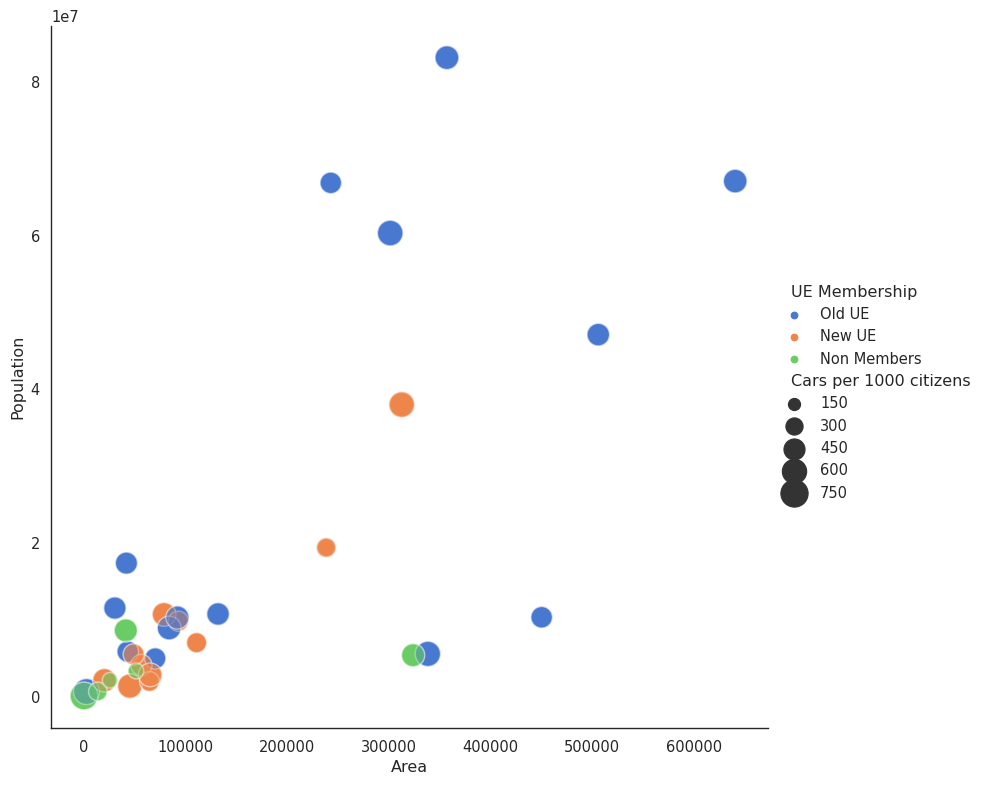

In [379]:
# Define the hue colors
hue_colors = {"New UE": "#1098F7", "Non Members": "#B89E97", "Old UE": "#000000"}
colors = palette

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Area", y="Population", hue="UE Membership", size="Cars per 1000 citizens",
            sizes=(40, 400), alpha=.4, palette="muted",
            height=8, data=df)

# **For fun**

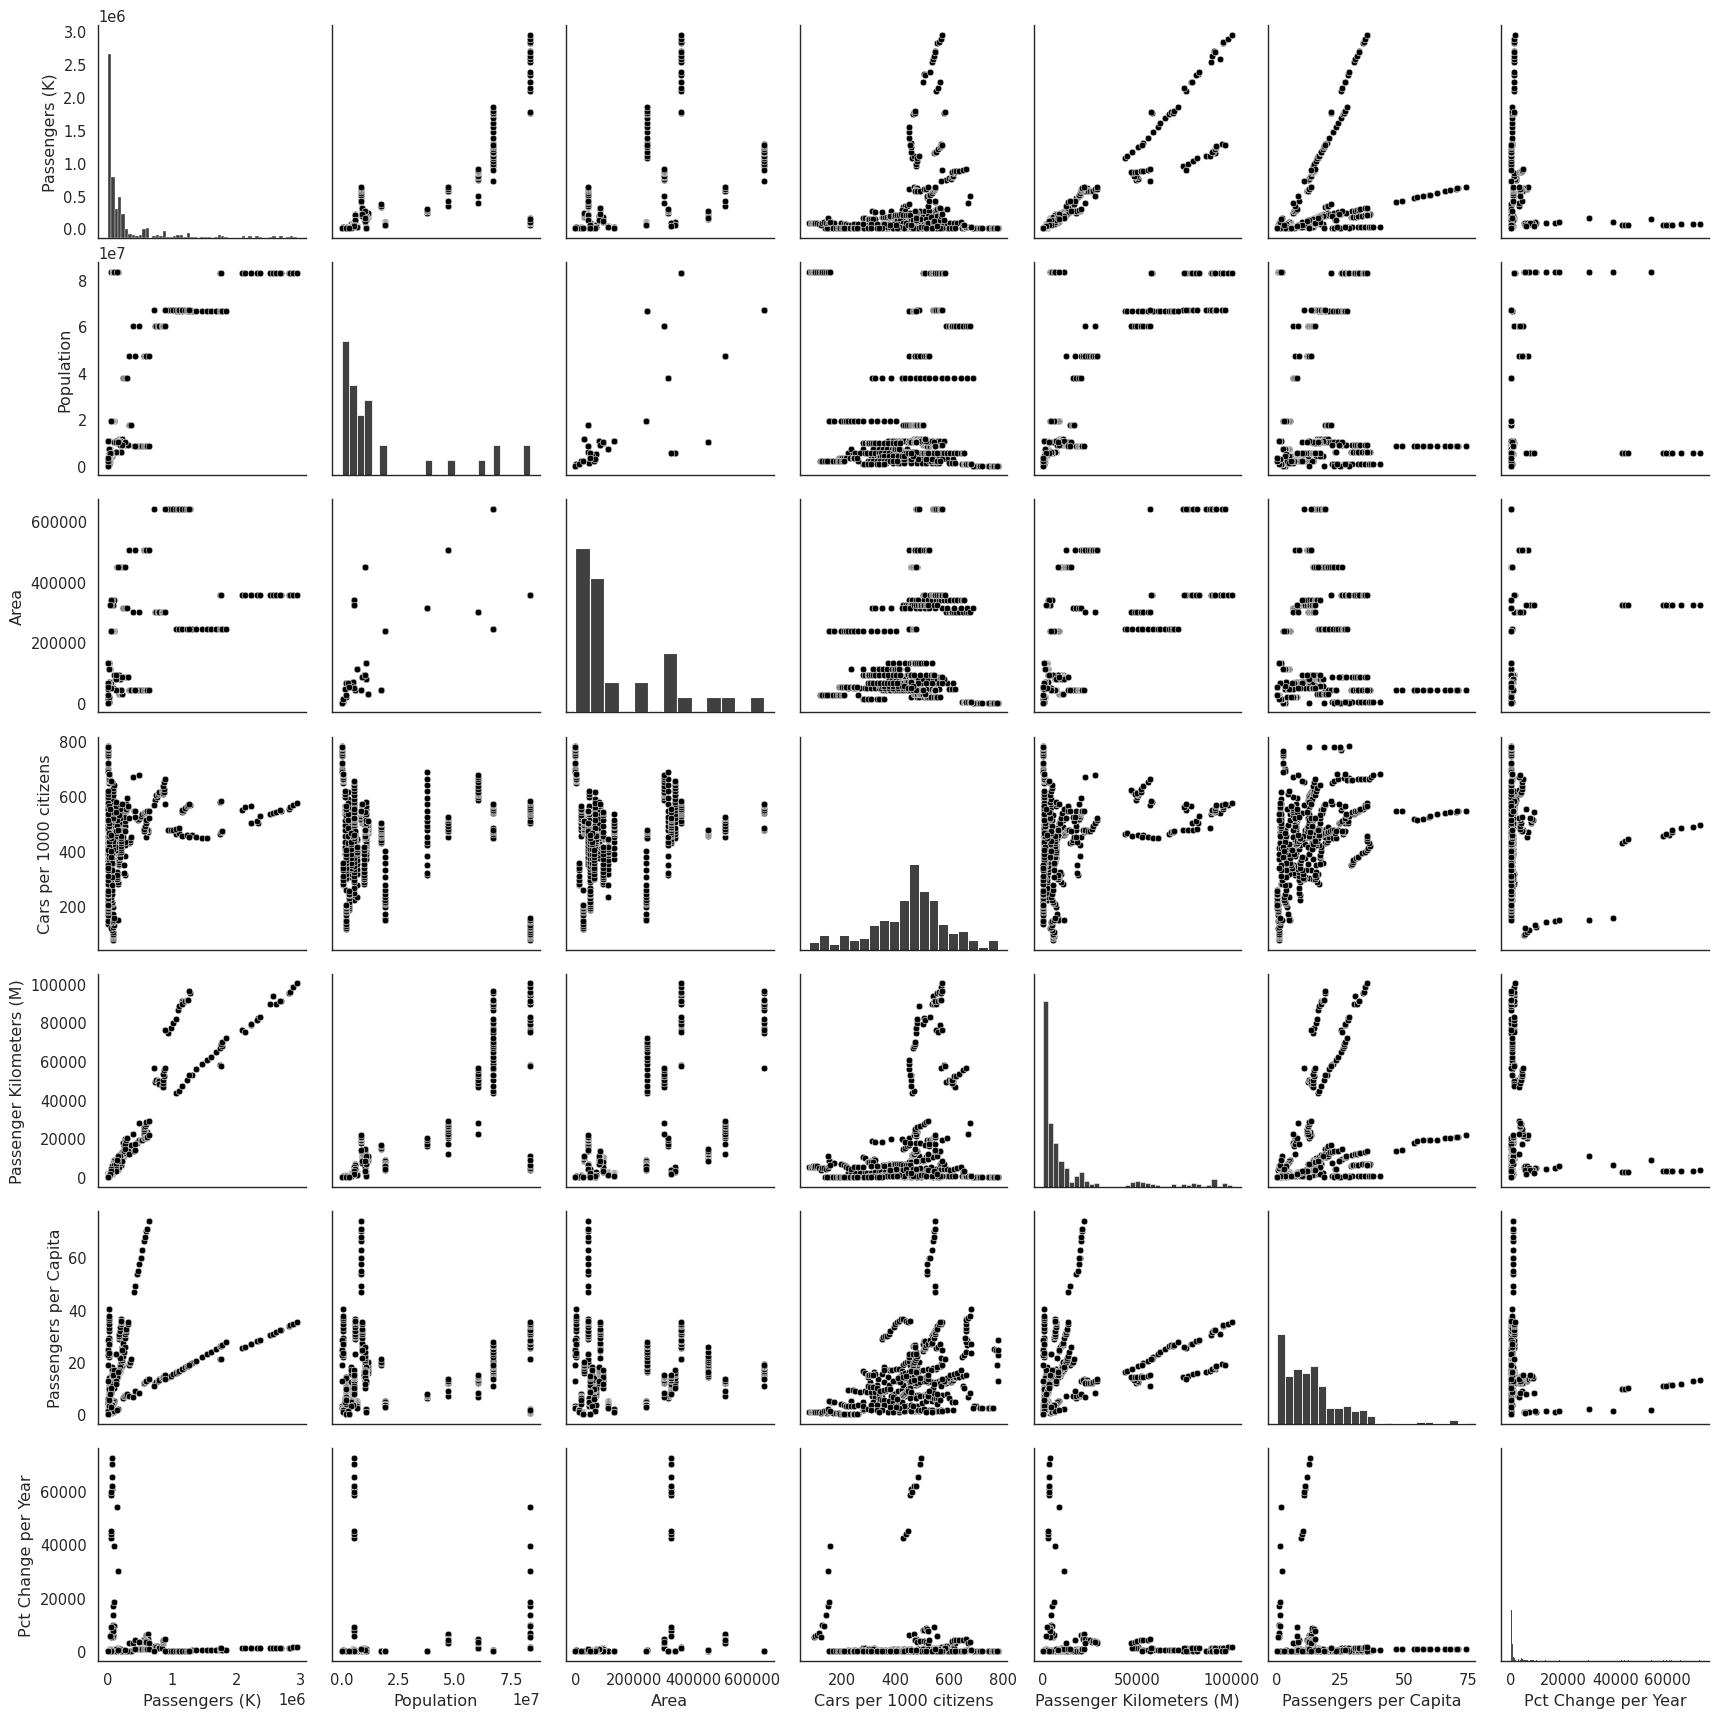

In [380]:
sns.pairplot (df)

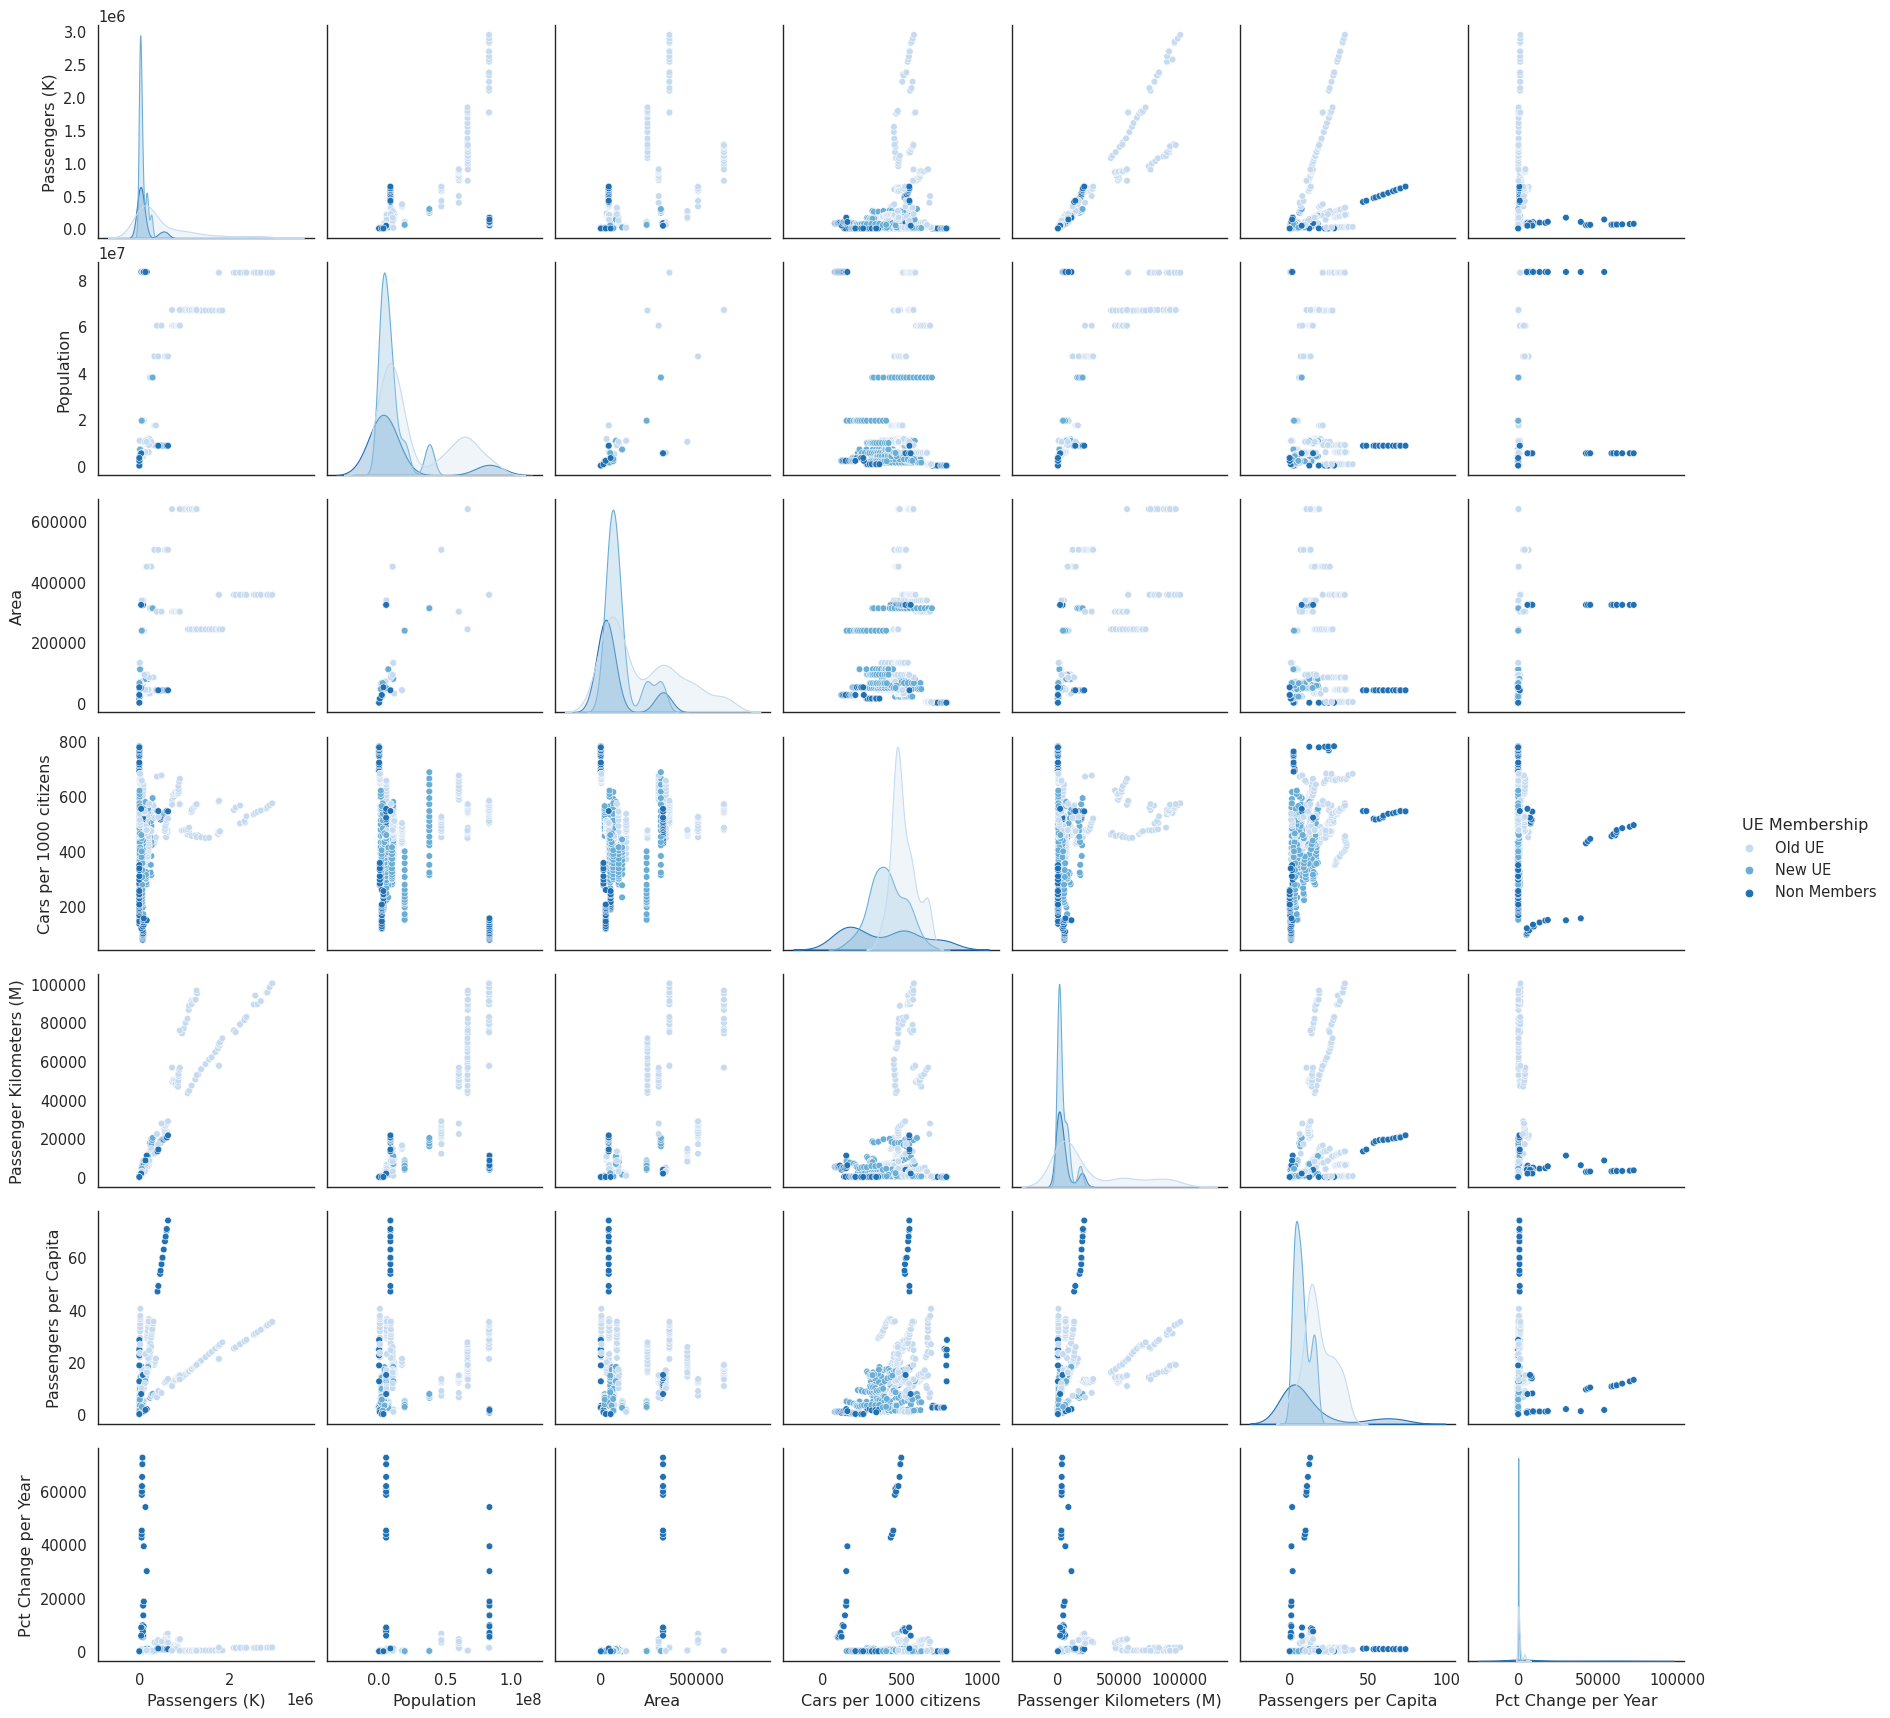

In [381]:
sns.pairplot (df, hue='UE Membership', palette='Blues')

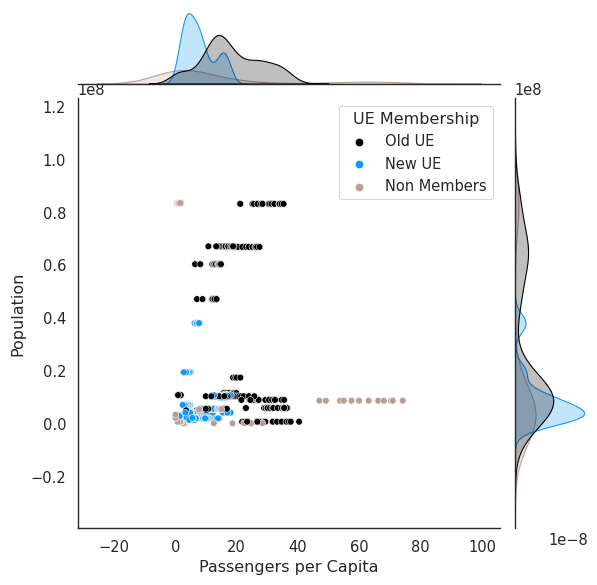

In [382]:
sns.jointplot(data=df, x="Passengers per Capita", y="Population", hue="UE Membership")

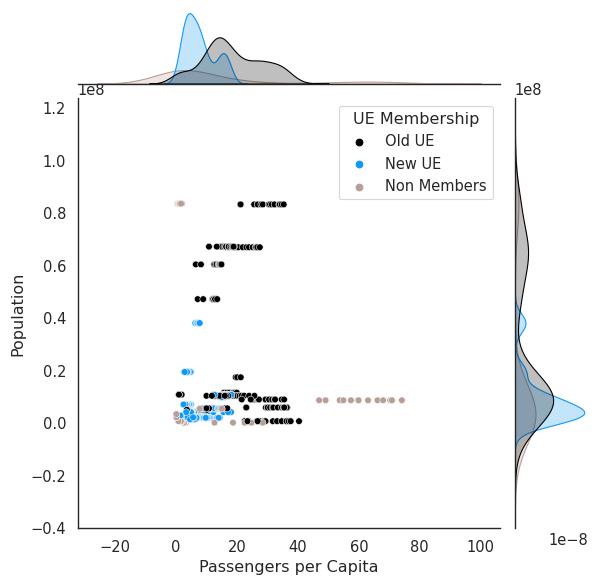

In [383]:
#jus one year?
sns.jointplot(data=df_filtered, x="Passengers per Capita", y="Population", hue="UE Membership")

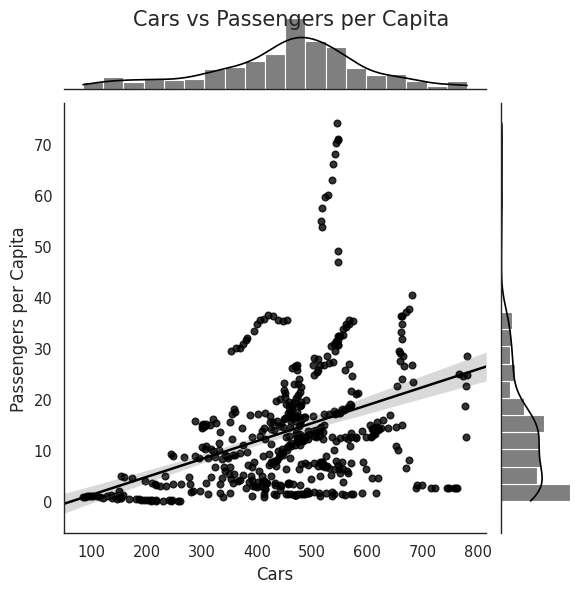

In [384]:
g = sns.jointplot(x="Cars per 1000 citizens", y="Passengers per Capita", data=df_filtered,
                  kind="reg", truncate=False)
                  #xlim=(0, None), ylim=(0, None),
                  #color="m", height=7)

# Set the axis labels
g.set_axis_labels("Cars", "Passengers per Capita", fontsize=12)

# Set the plot title
g.fig.suptitle("Cars vs Passengers per Capita", fontsize=15)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


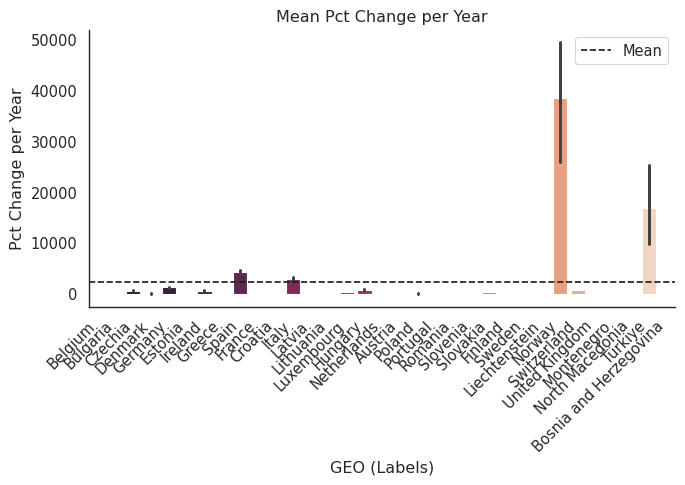

In [385]:
# Calculate the mean of Pct Change per Year
mean_pct_change = df['Pct Change per Year'].mean()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))

# Create the bar plot
sns.barplot(data=df, x='GEO (Labels)', y='Pct Change per Year', palette='rocket', ax=ax)

# Add a horizontal line at the mean value
ax.axhline(mean_pct_change, color='k', linestyle='--', label='Mean')

# Set the y-axis label and title
ax.set_ylabel('Pct Change per Year')
ax.set_title('Mean Pct Change per Year')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


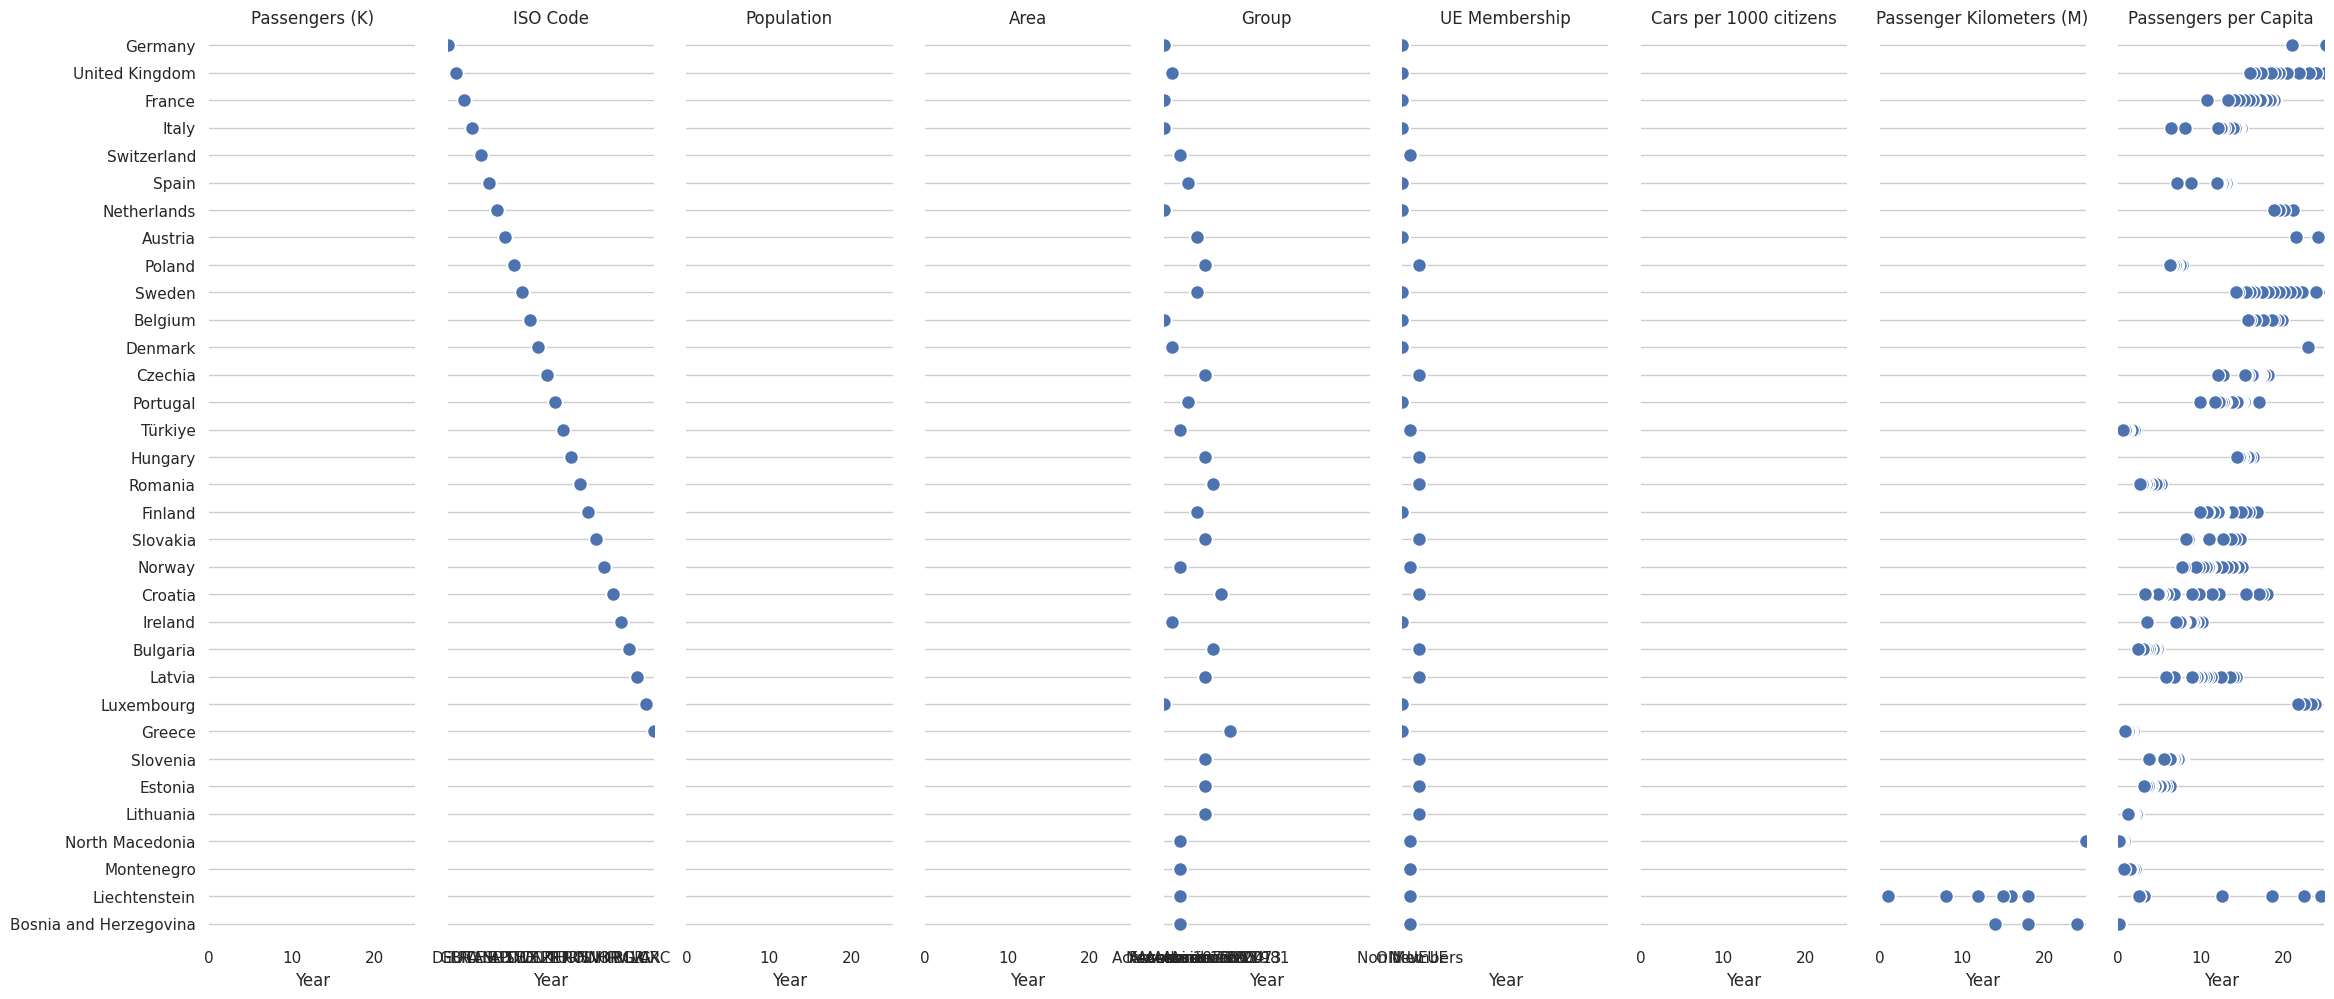

In [386]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(df.sort_values("Passengers (K)", ascending=False),
                 x_vars=df.columns[2:-1], y_vars=["GEO (Labels)"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Year", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Passengers (K)", "ISO Code", "Population",
          "Area", "Group", "UE Membership",
          "Cars per 1000 citizens", "Passenger Kilometers (M)",
          "Passengers per Capita", "Pct Change per Year"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)


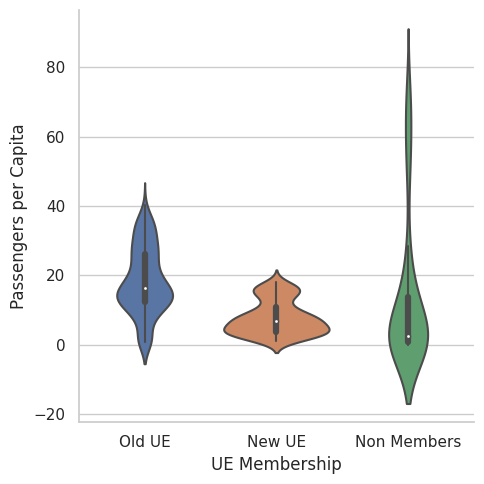

In [387]:
sns.catplot(
    data=df,  x="UE Membership", y="Passengers per Capita",
    kind="violin", split=True,
)

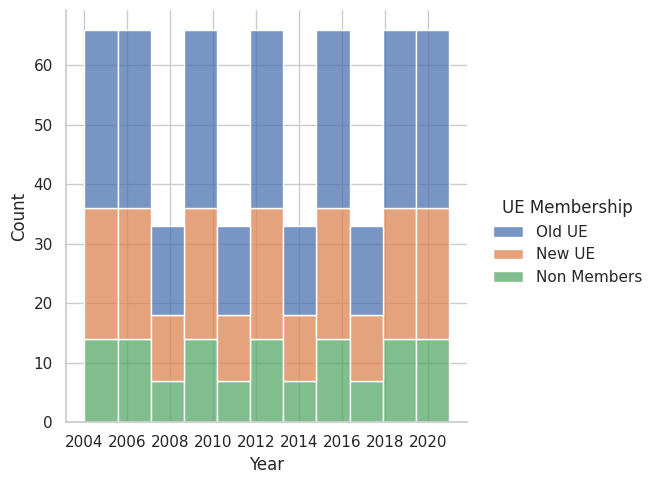

In [388]:
sns.displot(data=df, x="Year", hue="UE Membership", multiple="stack")

<Axes: xlabel='Passengers per Capita', ylabel='Proportion'>

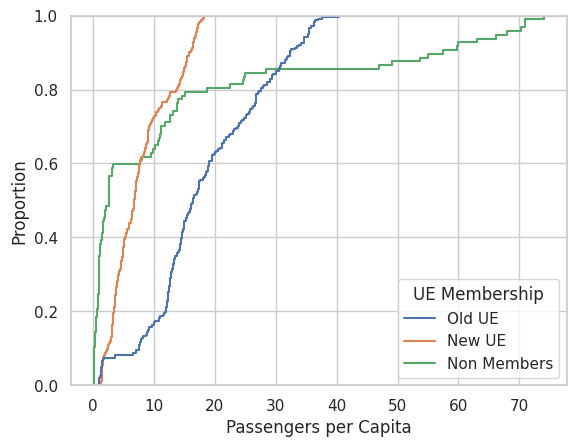

In [389]:
sns.ecdfplot(data=df, x="Passengers per Capita", hue="UE Membership")

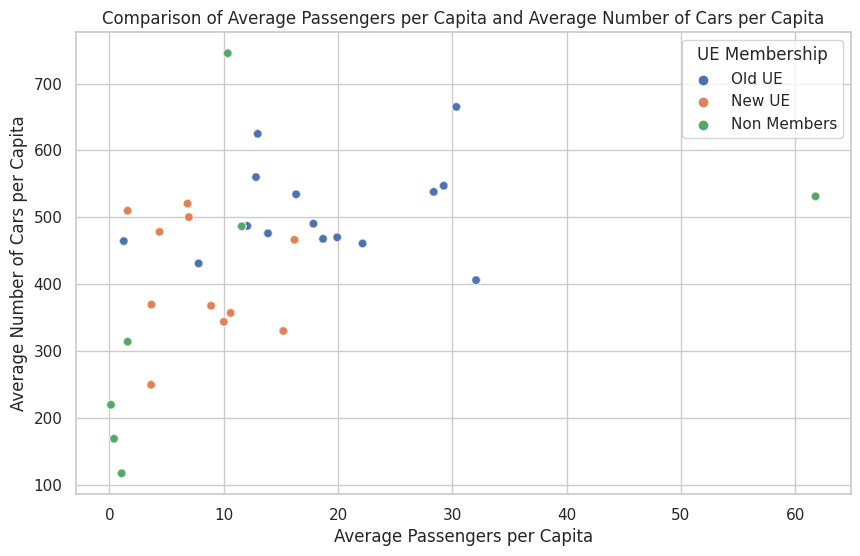

In [390]:
# Calculate the average number of cars per capita over all years
car_data["Avg_Cars_Per_Capita"] = car_data.mean(axis=1)

# Select the relevant columns from the passenger data
passenger_data = df[["GEO (Labels)", "Passengers per Capita", "UE Membership"]]

# Merge the passenger and car data based on the country names
merged_data = pd.merge(passenger_data, car_data, left_on="GEO (Labels)", right_index=True)

# Calculate the average passengers per capita over all years
merged_data["Avg_Passengers_Per_Capita"] = merged_data.groupby("GEO (Labels)")["Passengers per Capita"].transform("mean")

# Create a scatter plot with hue based on "UE Membership"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x="Avg_Passengers_Per_Capita", y="Avg_Cars_Per_Capita", hue="UE Membership", alpha=0.5)
plt.xlabel("Average Passengers per Capita")
plt.ylabel("Average Number of Cars per Capita")
plt.title("Comparison of Average Passengers per Capita and Average Number of Cars per Capita")
plt.legend(title="UE Membership")
plt.show()


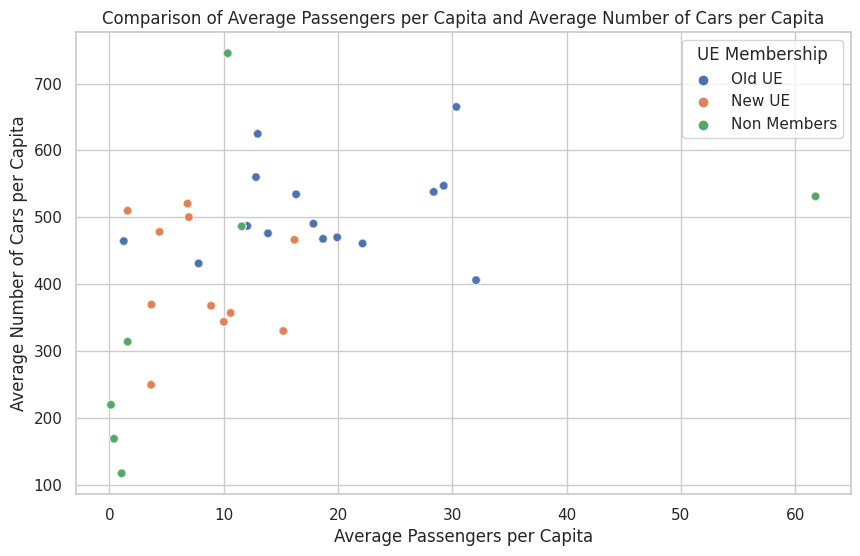

In [391]:
# Calculate the average number of cars per capita over all years
car_data["Avg_Cars_Per_Capita"] = car_data.mean(axis=1)

# Select the relevant columns from the passenger data
passenger_data = passenger_data[["GEO (Labels)", "Passengers per Capita", "UE Membership"]]

# Merge the passenger and car data based on the country names
merged_data = pd.merge(passenger_data, car_data, left_on="GEO (Labels)", right_index=True)

# Calculate the average passengers per capita over all years
merged_data["Avg_Passengers_Per_Capita"] = merged_data.groupby("GEO (Labels)")["Passengers per Capita"].transform("mean")

# Create a scatter plot with hue based on "UE Membership"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x="Avg_Passengers_Per_Capita", y="Avg_Cars_Per_Capita", hue="UE Membership", alpha=0.5)
plt.xlabel("Average Passengers per Capita")
plt.ylabel("Average Number of Cars per Capita")
plt.title("Comparison of Average Passengers per Capita and Average Number of Cars per Capita")
plt.legend(title="UE Membership")
plt.show()


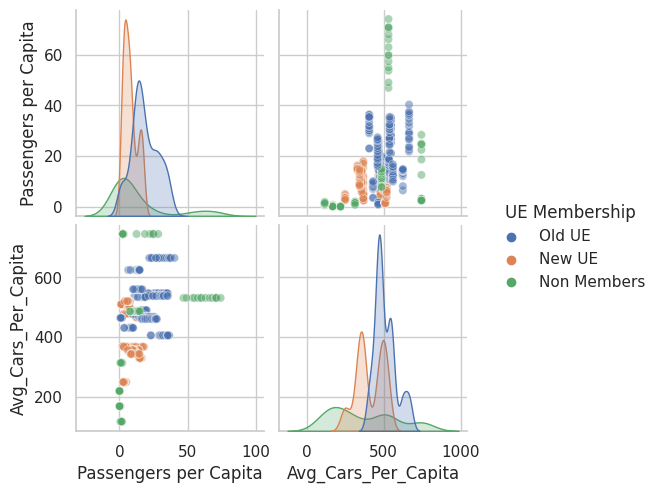

In [392]:
# Merge the passenger and car data based on the country names
merged_data = pd.merge(passenger_data, car_data, left_on="GEO (Labels)", right_index=True)

# Select the columns to include in the pairplot
columns_to_include = ["Passengers per Capita", "Avg_Cars_Per_Capita", "UE Membership"]

# Subset the merged data with the selected columns
subset_data = merged_data[columns_to_include]

# Create the pairplot
sns.pairplot(subset_data, hue="UE Membership", plot_kws={"alpha": 0.5})

# Display the pairplot
plt.show()


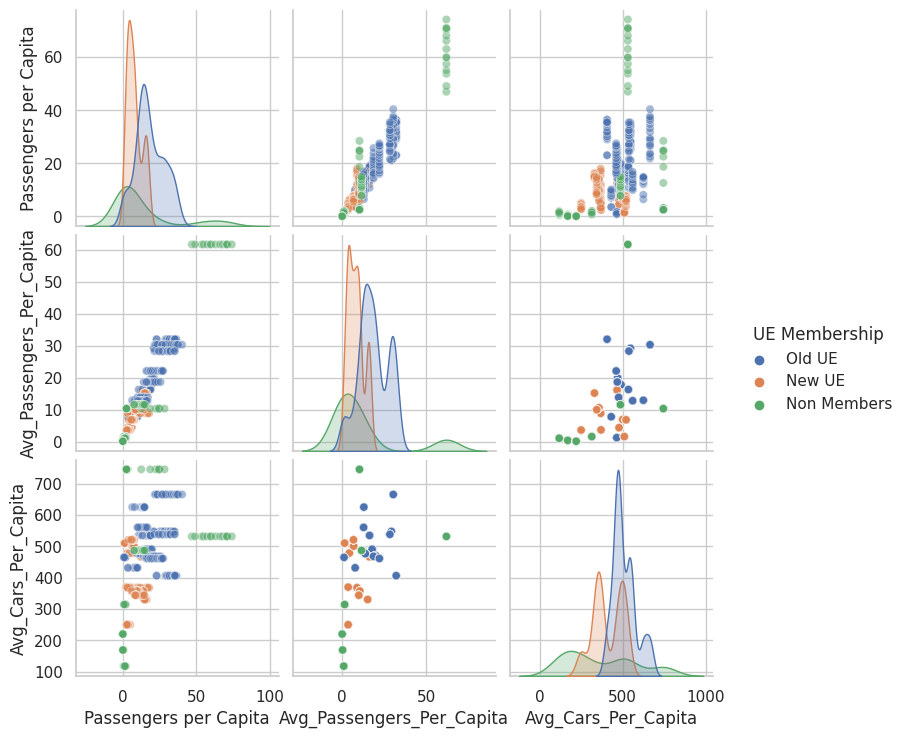

In [393]:
# Calculate the average number of cars per capita over all years
car_data["Avg_Cars_Per_Capita"] = car_data.mean(axis=1)

# Merge the passenger and car data based on the country names
merged_data = pd.merge(passenger_data, car_data, left_on="GEO (Labels)", right_index=True)

# Calculate the average passengers per capita over all years
merged_data["Avg_Passengers_Per_Capita"] = merged_data.groupby("GEO (Labels)")["Passengers per Capita"].transform("mean")

# Select the columns to include in the pairplot
columns_to_include = ["Passengers per Capita", "Avg_Passengers_Per_Capita", "Avg_Cars_Per_Capita", "UE Membership"]

# Subset the merged data with the selected columns
subset_data = merged_data[columns_to_include]

# Create the pairplot with grouping by "UE Membership"
sns.pairplot(subset_data, hue="UE Membership", plot_kws={"alpha": 0.5})

# Display the pairplot
plt.show()


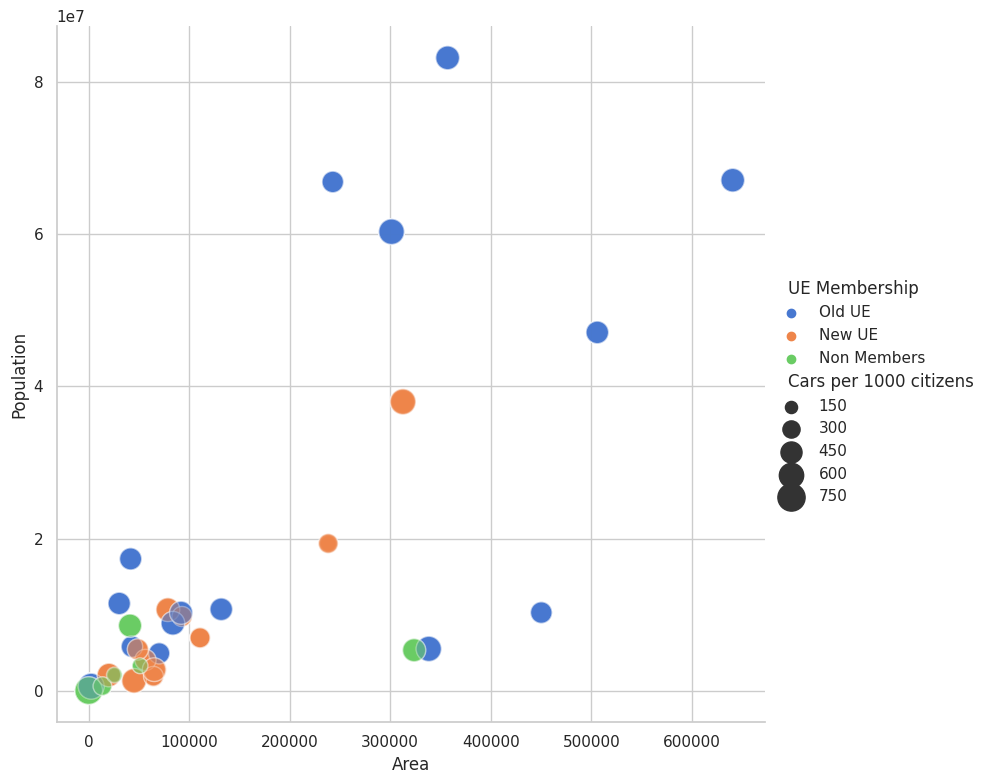

In [394]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Area", y="Population", hue="UE Membership", size="Cars per 1000 citizens",
            sizes=(40, 400), alpha=.4, palette="muted",
            height=8, data=df)

<Axes: xlabel='Year', ylabel='Passengers (K)'>

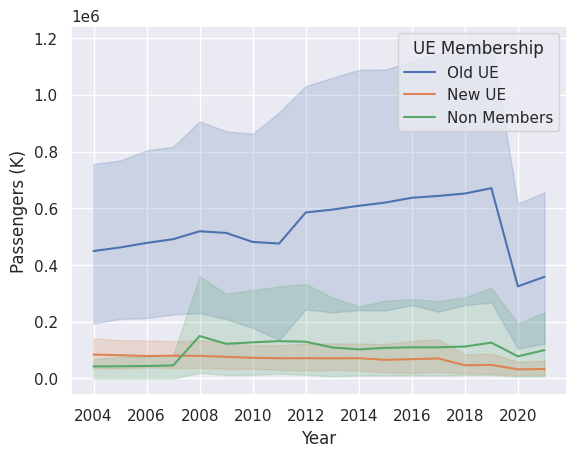

In [395]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="Year", y="Passengers (K)",
             hue="UE Membership",
             data=df)

In [396]:
import seaborn.objects as so

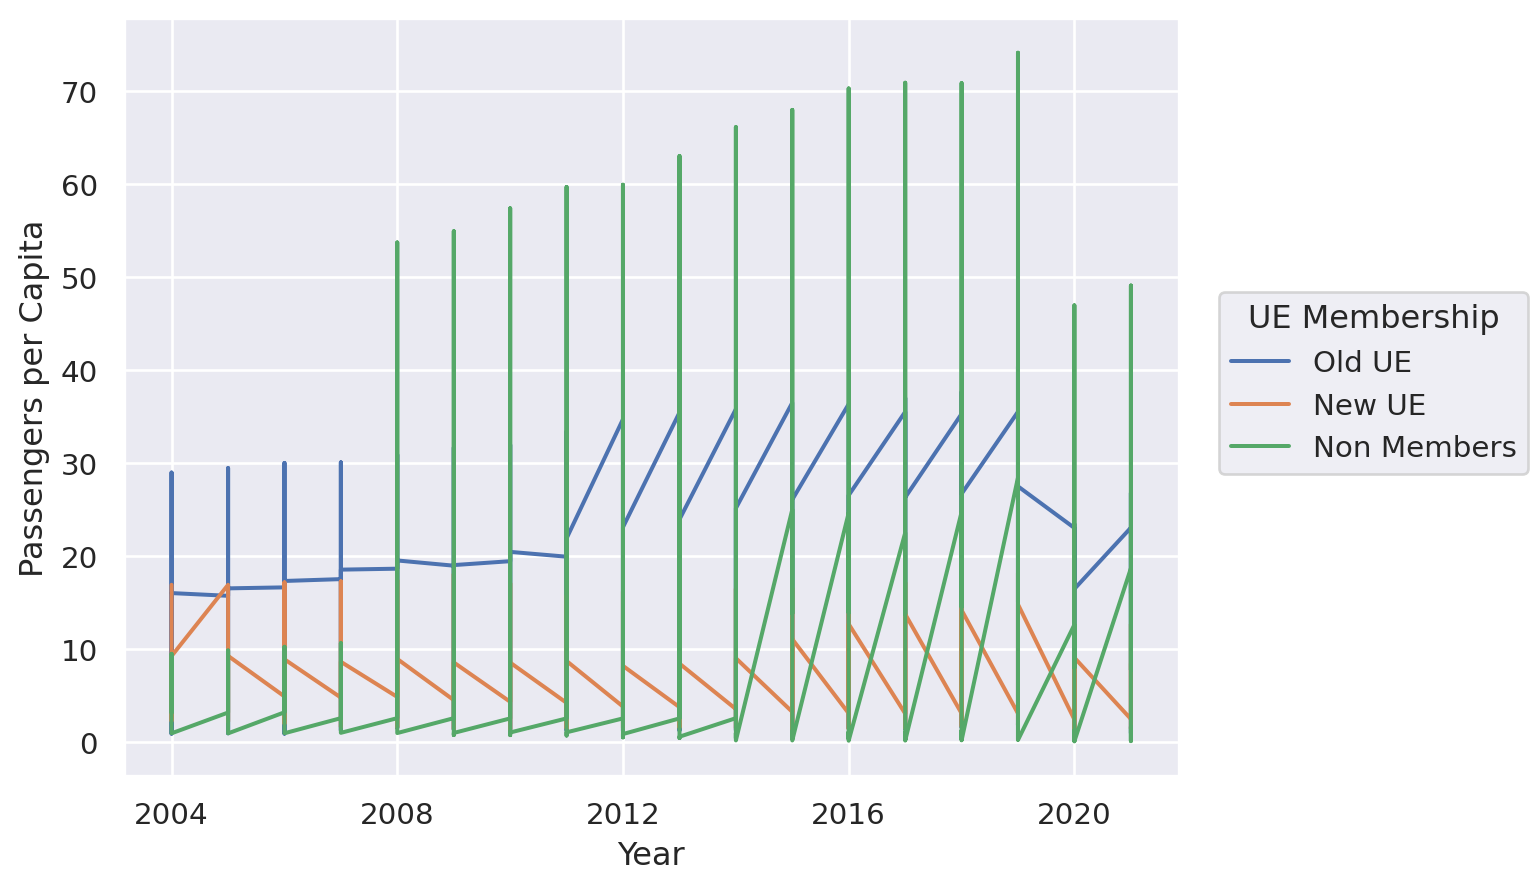

In [397]:
(
    so.Plot(df, x="Year", y="Passengers per Capita", color="UE Membership")
    .add(so.Line())
)

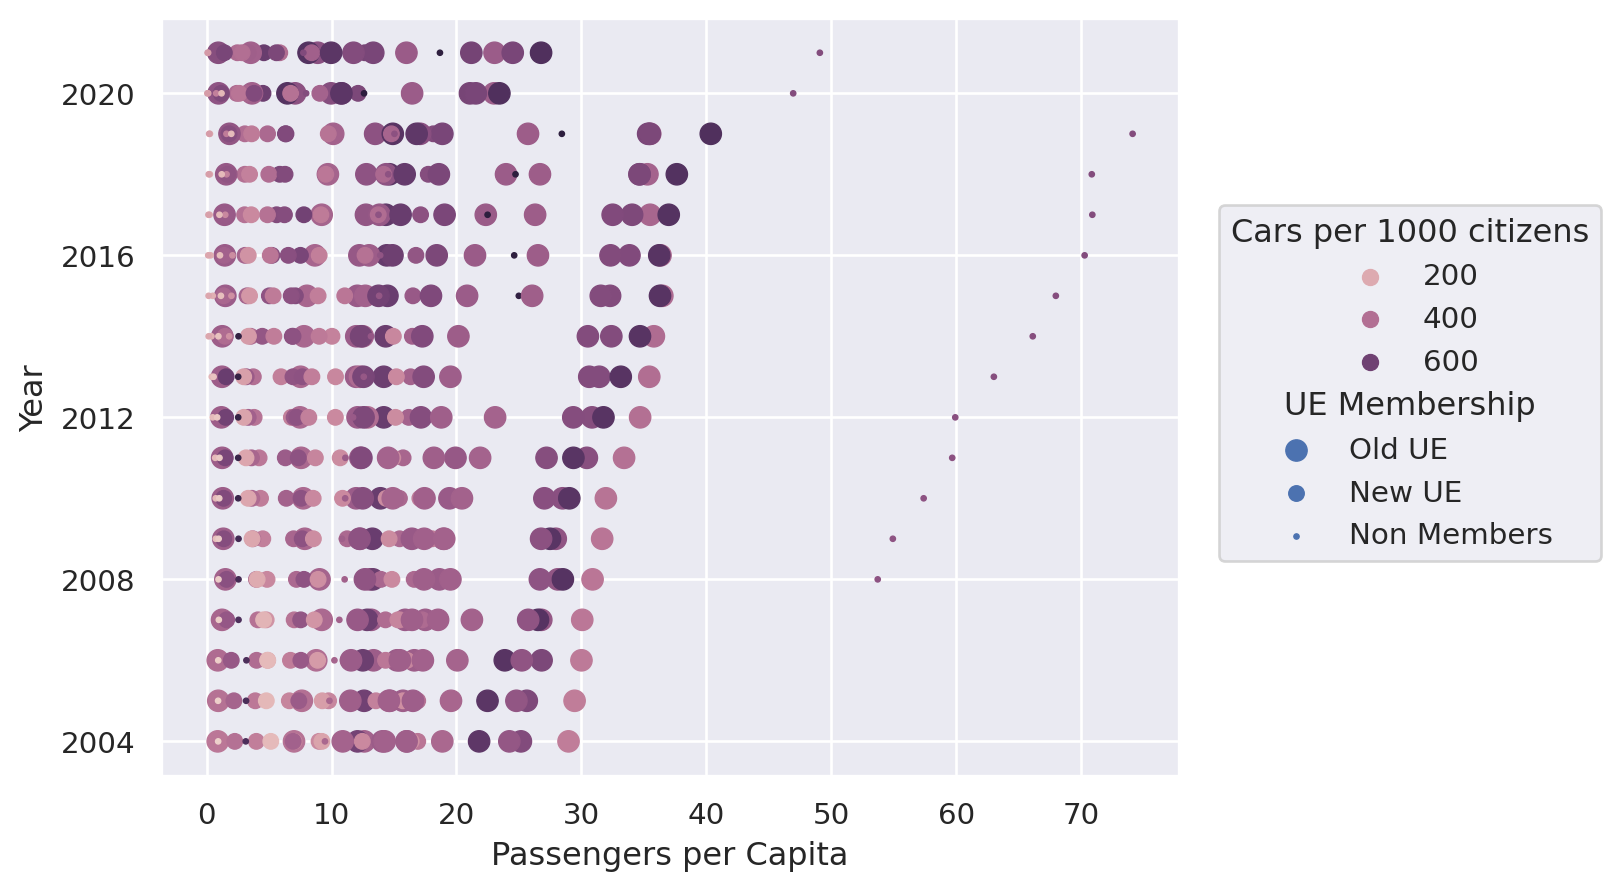

In [398]:
(
    so.Plot(
        df, x="Passengers per Capita", y="Year",
        color="Cars per 1000 citizens", pointsize="UE Membership",
    )
    .add(so.Dot())
)

# The Countries Comprasion per % change** 

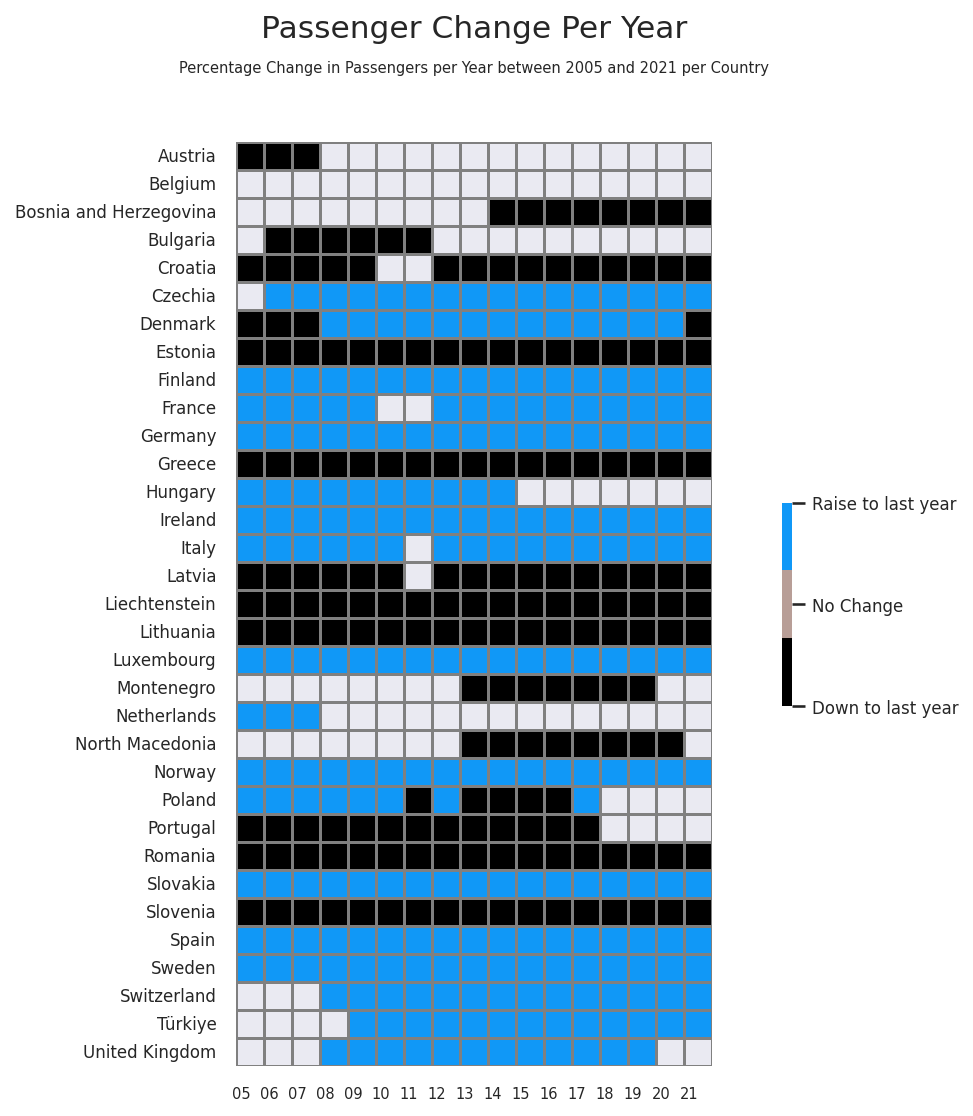

In [399]:
from matplotlib.colors import ListedColormap

# Define the custom color palette
palette = ["#000000", "#1098f7", "#b89e97", "#decccc", "#ffffff"]

# Define the custom colormap with more muted colors
cmap_colors = [palette[0], palette[2], palette[1]]
cmap = ListedColormap(cmap_colors)

# Preprocess the dataset
# Assuming the provided DataFrame is named 'df'
df_filtered = df[df['Year'] != '2004-01-01']  # Exclude the year 2004 from the dataset
data_wide = df_filtered.pivot(index='GEO (Labels)', columns='Year', values='Pct Change per Year')

# Create the heatmap
sns.set(style='dark', palette=palette)
plt.figure(figsize=(12, 8), dpi=150)
heatmap = sns.heatmap(data_wide, cmap=cmap, linewidths=0.5, annot=False, fmt='.2f', vmin=-0.1, vmax=0.1, cbar_kws={'ticks': [-0.1, 0, 0.1], 'shrink': 0.22}, square=True, linecolor='grey', linewidth=0.5)

# Modify the x-axis labels to display only the last two digits of the year
year_labels = [str(pd.Timestamp(label).year)[-2:] for label in df_filtered['Year'].unique()]
heatmap.set_xticklabels(year_labels)

# Modify the x-axis and y-axis labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('UE Membership', fontsize=12)
plt.xlabel('')
plt.ylabel('')

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=360, ha='right')

# Set the main title and subtitle
plt.title('Passenger Change Per Year', fontsize=15, y=1.1)
plt.text(0.5, 1.08, 'Percentage Change in Passengers per Year between 2005 and 2021 per Country', ha='center', va='center', transform=plt.gca().transAxes, fontsize=7)

# Set the colorbar label font size
cbar_kws = plt.gcf().axes[-1]
cbar_kws.tick_params(labelsize=8)

# Set font size for x-axis and y-axis tick labels
plt.xticks(fontsize=7)
plt.yticks(fontsize=8)

# Add legend labels
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-0.1, 0, 0.1])
cbar.set_ticklabels(['Down to last year', 'No Change', 'Raise to last year'])

# Show the plot
plt.show()
